# Motivation


### What is your dataset?
The dataset used in this project is the Erasmus+ Programme Mobility Data, which includes records of student and staff exchanges from 2014 to 2022. 
The dataset contains information on the following points: 

- Sending and receiving countries and cities
- Academic year and duration of mobility
- Field of education
- Participant demographics (e.g., gender, age)
- Information on participants with fewer opportunities
- And more

Since I wanted to include a visualization of the mobility flow as well I also included geodata from eurostat with:
- Local Administrative Units (LAU) from Eurostat, providing geographic boundaries and centroids for municipalities
- Nomenclature of Territorial Units for Statistics (NUTS) geodata for regional classifications

And lastly capital city coordinates for easy of visualization. 

### Why was this dataset chosen?
There were many reasons why I chose the data, the scale and complexity is one thing since it covers more than 2.3 million rows and 27 rows before geodata is added. 
The Erasmus+ programme represents one of the largest educational mobility initiatives in the world with student and staff exchanges across Europe and partner countries, so the impact of the programme is also a factor with its relanvancy. 
It was also a personal challenge, since the data contains multiple different datatypes with different encoding due to the nature of multiple countries adding to the data. \
The dataset was also chosen in part due to the political situation over in the US with students getting detained and deported, so I wanted to look into data from the European union to see the mobility in action since it promotes cross-border collaboration, cultural exchange, and a shared European identity. \
And lastly, I saw this project as a chance to both analyze and visualize the data but also to get an overview on where participants go, which countries serve as major senders or receivers, and how they change over time, this visualization aims to make the programme more visible, accessible, and relevant for people to chose where to go if they want to join the programme. 


### What is the intended user experience?
I want the user get an overview of the opportunities that is possible with the Erasmus+ programme, I want the end-user to engage with the Erasmus+ mobility data in a way that is both intuitive and insightful but also fun. \
I purposely use the martini glass structure to make room for the user to do their own exploration at the end, like "what kind of people migrate to spain or italy?", "Could it be people seeking the summer warmt?". 
These can be some thoughts I want the user to have at the end, and hopefully they might even think to themselves that it would an interesting opportunity to join in on the programme.

This is why I have the following: 
- Sending and receiving statistics
- Gender distribution of participants
- Top five partner countries for exchanges
- Regional "hubs" that attract or send large numbers of participants

Whether someone wants to discover popular destinations, track changes in mobility over time, or simply understand how connected Europe is through education, the visualization provides the tools to satisfy that curiosity.

# Basic Statistics and Data Preprocessing
To get anything meaningful out of the Erasmus+ mobility dataset a substantial amount of data cleaning and preprocessing were required. 

This short section outlines the challenges, and the preprocessing in the code will be given afterwards. 

Dataset Integration and Initial Challenges:
- The dataset spans mobility records from 2014 to 2022, and each year was originally provided as a separate xlsx files, which is the not usual file format that I am used to so I converted it to csv format. The data preprocessing was more involved than I had anticipated since I had hoped I had found a good tutorial for getting it into the right format with the following link: https://github.com/DigitalGeographyLab/mobitwin-erasmus/tree/main. However, I had to modify his "process_and_combine_erasmus_data.py" a bit for it to work. Even at the of the project I'm not entirely sure that it is handling the data 100% correctly since there are many factors in the dataset making it super complex to actually work with. Due to the multifaceted complexity I have chosen to take it as a learning experience. 
- Inconsistent column names across years (e.g., "Sending Organization" vs. "Sending Organisation")
- Inconsistent capitalization and spacing in column names
- Different encodings, due to multilingual data entries (e.g., accented characters in French, German, or Spanish). The default UTF-8 encoding failed for many rows, so Latin-1 was used. Although this allowed the files to load, it may not be the optimal long-term solution.

Geolocation and Mapping Challenges:
A key goal of this project was to visualize the spatial geodata. 

### LAU Matching
The first geocoding attempt used Local Administrative Units (LAU) to match cities with their coordinates. Despite this, many records failed due to inconsistent naming:
- Sending locations successfully matched via LAU: 1,022,454 / 2,324,317
- Receiving locations matched via LAU: 977,624 / 2,324,317

To improve the coverage, city names were normalized by standardizing capitalization, trimming whitespace, and removing special characters.
Also, to fill in remaining gaps, the geopy python package was used. 

Using this approach added a lot of data. 
Additional sending cities geocoded: 818,542 
- Final total (sending): 2,190,149 / 2,324,317
Additional receiving cities geocoded: 869,063 
- Final total (receiving): 2,043,959 / 2,324,317
This two-step process resulted in high geocoding coverage.
It was still not ideal, but it was much better than before.  
If more time was allocated I would have looked into further ways to handle it but I had to stop here.


In [10]:
!pip install geopandas
!pip install geopy
!pip install shapely
!pip install openpyxl

# Getting an overview of the data

In [23]:
import pandas as pd
df1 = pd.read_csv(r'C:/Users/Frederik/Programming/Socialdata2025/assignment3/processed/combined_erasmus_data.csv', sep=';', dtype=str, low_memory=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324317 entries, 0 to 2324316
Data columns (total 27 columns):
 #   Column                                     Dtype 
---  ------                                     ----- 
 0   Unnamed: 0                                 object
 1   Project Reference                          object
 2   Academic Year                              object
 3   Mobility Start Year/Month                  object
 4   Mobility Duration                          object
 5   Activity (mob)                             object
 6   Field                                      object
 7   Field of Education                         object
 8   Participant Country                        object
 9   Education Level                            object
 10  Participant Gender                         object
 11  Participant Profile                        object
 12  Fewer Opportunities                        object
 13  Participant Age                            object
 14  Se

In [25]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df1.head(5)

,Unnamed: 0,Project Reference,Academic Year,Mobility Start Year/Month,Mobility Duration,Activity (mob),Field,Field of Education,Participant Country,Education Level,Participant Gender,Participant Profile,Fewer Opportunities,Participant Age,Sending Country,Sending City,Sending Organization,Receiving Country,Receiving City,Receiving Organization,Actual Participants,Mobility Start Month,Actual Participants (Contracted Projects),Sending Organisation,Receiving Organisation,year,mov_type
0,0,2014-1-AT01-KA102-000074,2013-2014,2014-06,90,VET learners traineeships in companies abroad,Vocational Education and Training,"Hotel, restaurants and catering",Austria,??? - ? Unknown ?,Female,Learner,No,18,AT - Austria,Villach Warmbad,Kärntner Tourismusschulen Warmbad Villach,UK - United Kingdom,Barmouth,Aber House,1.0,NaN,NaN,NaN,NaN,2014,Short-term
1,1,2014-1-AT01-KA102-000074,2013-2014,2014-06,91,VET learners traineeships in companies abroad,Vocational Education and Training,"Hotel, restaurants and catering",Slovenia,??? - ? Unknown ?,Male,Learner,No,19,AT - Austria,Villach Warmbad,Kärntner Tourismusschulen Warmbad Villach,DE - Germany,Aschheim/Dornach,Sol Melia Deutschland GmbH,1.0,NaN,NaN,NaN,NaN,2014,Short-term
2,2,2014-1-AT01-KA102-000074,2013-2014,2014-06,91,VET learners traineeships in companies abroad,Vocational Education and Training,"Hotel, restaurants and catering",Slovenia,??? - ? Unknown ?,Male,Learner,No,20,AT - Austria,Villach Warmbad,Kärntner Tourismusschulen Warmbad Villach,DE - Germany,Munich,Arabella Hospitality SE - Sheraton Munich Airp...,1.0,NaN,NaN,NaN,NaN,2014,Short-term
3,3,2014-1-AT01-KA102-000074,2013-2014,2014-06,92,VET learners traineeships in companies abroad,Vocational Education and Training,"Hotel, restaurants and catering",Austria,??? - ? Unknown ?,Female,Learner,No,19,AT - Austria,Villach Warmbad,Kärntner Tourismusschulen Warmbad Villach,ES - Spain,Maspalomas,Grand Hotel Residencia,1.0,NaN,NaN,NaN,NaN,2014,Short-term
4,4,2014-1-AT01-KA102-000074,2013-2014,2014-06,92,VET learners traineeships in companies abroad,Vocational Education and Training,"Hotel, restaurants and catering",Austria,??? - ? Unknown ?,Female,Learner,No,21,AT - Austria,Villach Warmbad,Kärntner Tourismusschulen Warmbad Villach,ES - Spain,Maspalomas,Grand Hotel Residencia,1.0,NaN,NaN,NaN,NaN,2014,Short-term


In [28]:
df1.isnull().sum().sort_values(ascending=False)

Sending Organisation                         2050327
Receiving Organisation                       2050327
Mobility Start Month                         2039309
Actual Participants (Contracted Projects)    2039309
Project Reference                             718080
Mobility Start Year/Month                     285008
Actual Participants                           285008
Receiving Organization                        273991
Sending Organization                          273990
Receiving City                                     8
Sending City                                       2
Participant Gender                                 0
Education Level                                    0
Participant Country                                0
Field of Education                                 0
Field                                              0
Activity (mob)                                     0
Mobility Duration                                  0
Academic Year                                 

In [30]:
df1.describe(include='all').transpose()

,count,unique,top,freq
Unnamed: 0,2324317,2324317,2324316,1
Project Reference,1606237,31247,2018-1-IT02-KA103-047045,2652
Academic Year,2324317,12,2018-2019,305513
Mobility Start Year/Month,2039309,95,2019-09,125845
Mobility Duration,2324317,472,90,75171
Activity (mob),2324317,25,Student mobility for studies between Programme...,1531018
Field,2324317,4,Higher Education,2241785
Field of Education,2324317,342,"Business and administration, not further defined",232550
Participant Country,2324317,260,Germany,317916
Education Level,2324317,15,ISCED-6 - First cycle / Bachelor’s or equivale...,1449915


# Combined Data Frame

As mentioned earlier, I combined it through the python script mentioned from the xlsx files, so this here is the result of that. 

In [ ]:
import pandas as pd
df_temp = pd.read_csv(r'C:/Users/Frederik/Programming/Socialdata2025/assignment3/processed/combined_erasmus_data.csv', sep=';', dtype=str, low_memory=False)

# Check the first few rows of problematic columns
problematic_cols = [1, 3, 12, 16, 19, 21, 23, 24]
col_names = df_temp.columns[problematic_cols]
print("Column names:", col_names)
for col in col_names:
    print(f"\nExamining column: {col}")
    print(df_temp[col].head(10))
    print(f"Unique values sample: {df_temp[col].unique()[:5]}")

Column names: Index(['Project Reference', 'Mobility Start Year/Month', 'Fewer Opportunities',
       'Sending Organization', 'Receiving Organization',
       'Mobility Start Month', 'Sending Organisation',
       'Receiving Organisation'],
      dtype='object')

Examining column: Project Reference
0    2014-1-AT01-KA102-000074
1    2014-1-AT01-KA102-000074
2    2014-1-AT01-KA102-000074
3    2014-1-AT01-KA102-000074
4    2014-1-AT01-KA102-000074
5    2014-1-AT01-KA102-000142
6    2014-1-AT01-KA102-000142
7    2014-1-AT01-KA102-000142
8    2014-1-AT01-KA102-000142
9    2014-1-AT01-KA102-000142
Name: Project Reference, dtype: object
Unique values sample: ['2014-1-AT01-KA102-000074' '2014-1-AT01-KA102-000142'
 '2014-1-AT01-KA102-000151' '2014-1-AT01-KA102-000154'
 '2014-1-AT01-KA102-000172']

Examining column: Mobility Start Year/Month
0    2014-06
1    2014-06
2    2014-06
3    2014-06
4    2014-06
5    2014-06
6    2014-06
7    2014-06
8    2014-06
9    2014-06
Name: Mobility Start Year/

# Language formatting
One thing I encountered was that using the standard utf-8 encoding was not enough to handle all the languages used in the dataset. \
Through the following code I had to switch to latin1 encoding, to handle problematic spellings as the naming convention is faithful to their original countries spelling.
And this was the sanity check I used:

In [ ]:
file_path = r'C:/Users/Frederik/Programming/Socialdata2025/assignment3/processed/combined_erasmus_data.csv'

try:
    df_test_encoding = pd.read_csv(file_path, sep=';', dtype=str, low_memory=False, encoding='utf-8')
    # Check a problematic city based on your list, e.g., a German city with an umlaut or look for '�' in a sample
    if not df_test_encoding['Sending City'].astype(str).str.contains('�').any():
        print("UTF-8 seems to work")
        df = df_test_encoding
    else:
        raise ValueError("UTF-8 still shows replacement characters.")
except (UnicodeDecodeError, ValueError) as e_utf8:
    print(f"UTF-8 failed: {e_utf8}. Trying 'latin1'...")
    df_test_encoding = pd.read_csv(file_path, sep=';', dtype=str, low_memory=False, encoding='latin1')
    if not df_test_encoding['Sending City'].astype(str).str.contains('�').any():
        print("Latin-1 seems to work.")
        df = df_test_encoding
    else:
        raise ValueError("Latin-1 still shows replacement characters.")


UTF-8 failed: UTF-8 still shows replacement characters.. Trying 'latin1'...
Latin-1 seems to work.


In [1]:
import pandas as pd
import numpy as np

# Loading the actual dataframe with correct encoding from previous step
df = pd.read_csv(r'C:/Users/Frederik/Programming/Socialdata2025/assignment3/processed/combined_erasmus_data.csv', sep=';', dtype=str, low_memory=False, encoding='latin1')

def standardize_column_name(name):
    return name.lower().replace(' ', '_') # remove white space in columns (excel conventions.. smh.)

column_mapping = {col: standardize_column_name(col) for col in df.columns}
df = df.rename(columns=column_mapping) # rename correctly.

# Due to the nature of the data, there are both UK/US spelling, which we'll handle here
if 'sending_organization' in df.columns and 'sending_organisation' in df.columns:
    # Fill NaNs in one column with values from the other
    df['sending_organization'] = df['sending_organization'].fillna(df['sending_organisation'])
    df = df.drop('sending_organisation', axis=1)
    df = df.rename(columns={'sending_organization': 'sending_organisation'})  # Standardize to UK spelling

# Do the same for receiving organization/organisation
if 'receiving_organization' in df.columns and 'receiving_organisation' in df.columns:
    df['receiving_organization'] = df['receiving_organization'].fillna(df['receiving_organisation'])
    df = df.drop('receiving_organisation', axis=1)
    df = df.rename(columns={'receiving_organization': 'receiving_organisation'})  # Standardize to UK spelling

# Similar approach for mobility date columns, since we have different ways of doing the same thing.
if 'mobility_start_year/month' in df.columns and 'mobility_start_month' in df.columns:
    # Convert to datetime for proper comparison
    df['mobility_start_date'] = pd.to_datetime(df['mobility_start_year/month'], errors='coerce')
    temp_date = pd.to_datetime(df['mobility_start_month'], errors='coerce')
    df['mobility_start_date'] = df['mobility_start_date'].fillna(temp_date)
    df = df.drop(['mobility_start_year/month', 'mobility_start_month'], axis=1)

In [2]:
# The fewer_opportunities column has some weird formatting, so cleaning it up is in order.
def clean_fewer_opportunities(val):
    if pd.isna(val) or val == '-' or val == '???' or val == '0':
        return np.nan  # Mark as missing data
    elif val.lower() == 'yes':
        return 'Yes'
    elif val.lower() == 'no':
        return 'No'
    else:
        return val  # Keep any other values for manual inspection

df['fewer_opportunities'] = df['fewer_opportunities'].apply(clean_fewer_opportunities)
df['project_reference'] = df['project_reference'].astype(str)

# General overview of the data

In [3]:
print(f"Dataset spans from {df['mobility_start_date'].min()} to {df['mobility_start_date'].max()}")
print(f"Total number of mobility records: {len(df)}")
print(f"Number of unique projects: {df['project_reference'].nunique()}")

# What are the most frequent countries participating?
if 'sending_country' in df.columns and 'receiving_country' in df.columns:
    print("\nTop 5 sending countries:")
    print(df['sending_country'].value_counts().head())
    
    print("\nTop 5 receiving countries:")
    print(df['receiving_country'].value_counts().head())


# Get yearly participant count
df['year'] = df['mobility_start_date'].dt.year
yearly_counts = df.groupby('year').size()
print("\nParticipation by year:")
print(yearly_counts)

# Lets check the fewer opportunities we did before. 
if 'fewer_opportunities' in df.columns:
    fewer_opp_counts = df['fewer_opportunities'].value_counts(dropna=False)
    print("\nFewer Opportunities statistics:")
    print(fewer_opp_counts)
    
    # Percentage of participants with fewer opportunities over time
    fewer_opp_by_year = df.groupby('year')['fewer_opportunities'].apply(
        lambda x: (x == 'Yes').sum() / len(x) if len(x) > 0 else 0
    )
    print("\nPercentage of participants with fewer opportunities by year:")
    print(fewer_opp_by_year)

Dataset spans from 2014-06-01 00:00:00 to 2022-12-01 00:00:00
Total number of mobility records: 2324317
Number of unique projects: 31248

Top 5 sending countries:
sending_country
DE - Germany        317717
ES - Spain          313455
FR - France         313327
IT - Italy          284412
NL - Netherlands    109833
Name: count, dtype: int64

Top 5 receiving countries:
receiving_country
ES - Spain             355042
DE - Germany           234137
FR - France            216913
IT - Italy             202554
UK - United Kingdom    171697
Name: count, dtype: int64

Participation by year:
year
2014    159980
2015    265453
2016    281813
2017    293358
2018    303223
2019    302410
2020    159082
2021    248271
2022    310727
dtype: int64

Fewer Opportunities statistics:
fewer_opportunities
No     1765263
NaN     397360
Yes     114386
1        47308
Name: count, dtype: int64

Percentage of participants with fewer opportunities by year:
year
2014    0.050825
2015    0.050404
2016    0.065444
2017

# Change over years

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create participants_count using the other column.
df['participants_count'] = pd.to_numeric(df['actual_participants'], errors='coerce').fillna(0).astype(int)

# Fill it
if 'actual_participants' in df.columns and 'participants_count' not in df.columns:
    df['participants_count'] = pd.to_numeric(df['actual_participants'], errors='coerce').fillna(0).astype(int)

# Ensure 'year' column is numeric for proper ordering
if 'year' in df.columns:
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df.dropna(subset=['year'], inplace=True) # Remove rows where year couldn't be converted
    df['year'] = df['year'].astype(int)

# Set a nice Seaborn style for consistency, just as we have been taught.
sns.set_style("whitegrid")

# Dataset Statistics & Exploratory Data Analysis
To get a better understanding of the Erasmus+ dataset, I used pandas .info(), .head(), .isnull().sum(), and .describe() for quick overview of the data, and if there were problematic data that I did not catch in the previous steps.


Next, I went straight to the questions that I wanted answers to: 
- How many participants were involved each year?
- Which countries were the most active in sending and receiving participants?
- What did the gender distribution of participants look like?

Based on these, I created a series of visualizations to highlight trends over time, identify the top sending and receiving countries, and show the overall gender balance in the program from 2015 to 2022 with interactive visualization in mind



# Gender distribution of programme particpants

Original unique values in 'participant_gender':
['Female' 'Male' 'Undefined']
Number of NaNs in 'participant_gender': 0

Cleaned unique values in 'gender_cleaned':
['Female' 'Male' 'Unknown']

Participant counts by gender:
gender_cleaned
Female     1280464
Male        835908
Unknown       1111
Name: participants_count, dtype: int64


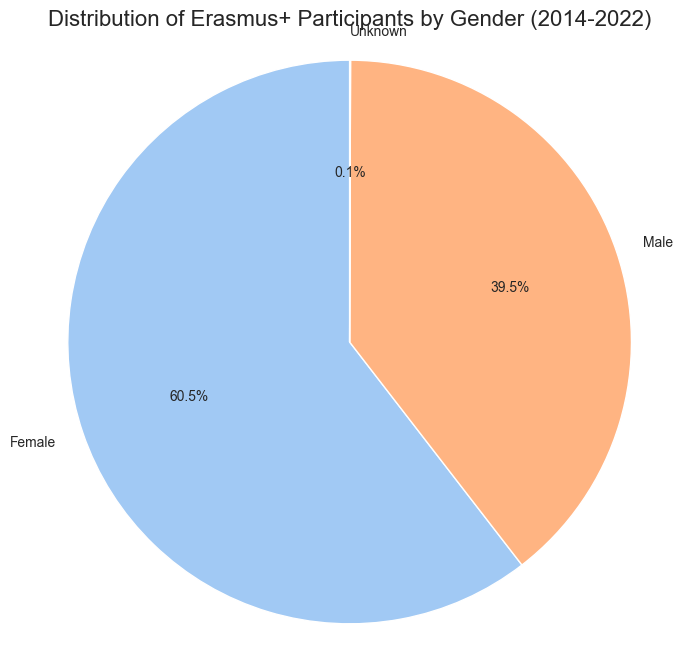

In [7]:
print("Original unique values in 'participant_gender':")
print(df['participant_gender'].unique())
print(f"Number of NaNs in 'participant_gender': {df['participant_gender'].isnull().sum()}")

# Clean and standardize gender values
def clean_gender(gender):
    if pd.isna(gender):
        return 'Unknown'
    
    gender_str = str(gender).strip().lower()
    if gender_str in ['male', 'm']:
        return 'Male'
    elif gender_str in ['female', 'f']:
        return 'Female'
    elif gender_str in ['non-binary', 'other', '-']: # To be politically correct.
        return 'Other'
    else:
        return 'Unknown' # Catch-all for sparse or unclear entries

df['gender_cleaned'] = df['participant_gender'].apply(clean_gender)

print("\nCleaned unique values in 'gender_cleaned':")
print(df['gender_cleaned'].unique())

# Aggregate participant counts by cleaned gender
gender_counts = df.groupby('gender_cleaned')['participants_count'].sum().sort_values(ascending=False)

print("\nParticipant counts by gender:")
print(gender_counts)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',  # Format for percentages
    startangle=90,      # Start the first slice at the top
    colors=sns.color_palette('pastel') # Use a Seaborn color palette
)
plt.title('Distribution of Erasmus+ Participants by Gender (2014-2022)', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Change over years

Aggregating yearly participant counts...

Total participants per year:
   year  participants_count
0  2014              166071
1  2015              275693
2  2016              293142
3  2017              304374
4  2018              314794
5  2019              314643
6  2020              165245
7  2021               45218
8  2022              238303
Yearly total data saved to data/yearly_total.csv for website use.
Static bar plot saved to assets/yearly_participants_bar.png


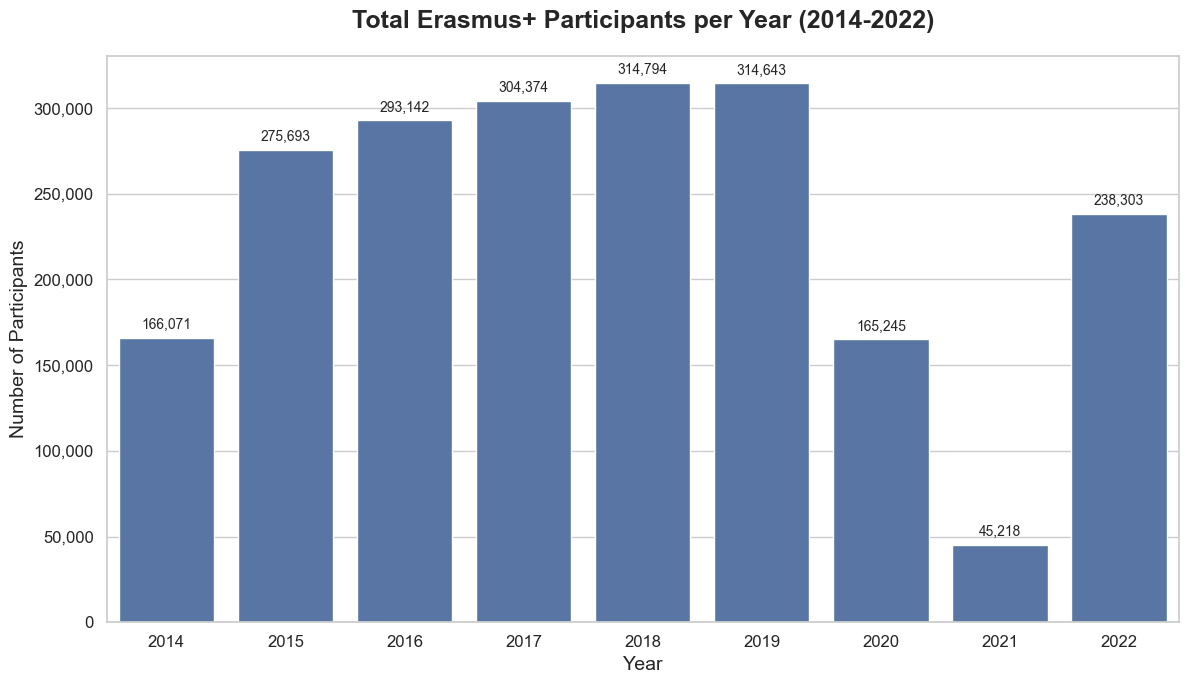

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os 

print("Aggregating yearly participant counts...")
yearly_participants = df.groupby('year')['participants_count'].sum().reset_index()

# Sort by year to ensure the plot is in chronological order
yearly_participants = yearly_participants.sort_values('year')

print("\nTotal participants per year:")
print(yearly_participants)

# Create output folder. 
output_csv_path = 'data/yearly_total.csv' 
output_data_dir = os.path.dirname(output_csv_path)

if output_data_dir and not os.path.exists(output_data_dir):
    os.makedirs(output_data_dir)
    print(f"Created directory: {output_data_dir}")
yearly_participants.to_csv(output_csv_path, index=False)
print(f"Yearly total data saved to {output_csv_path} for website use.")


sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7)) 
ax = sns.barplot(
    x='year',
    y='participants_count',
    data=yearly_participants,
)

ax.set_title('Total Erasmus+ Participants per Year (2014-2022)', fontsize=18, pad=20, weight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Participants', fontsize=14)
plt.xticks(fontsize=12) #
plt.yticks(fontsize=12)
plt.tight_layout() 

# Format y-axis with commas for readability
formatter = mtick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)

for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ','), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                size=10, 
                xytext = (0, 9), 
                textcoords = 'offset points')

output_image_path = 'assets/yearly_participants_bar.png' 
output_assets_dir = os.path.dirname(output_image_path)

if output_assets_dir and not os.path.exists(output_assets_dir):
    os.makedirs(output_assets_dir)
    print(f"Created directory: {output_assets_dir}")
plt.savefig(output_image_path, dpi=300, bbox_inches='tight') 
print(f"Static bar plot saved to {output_image_path}")
plt.show() 


# Top recieving and sending countries

C:\Users\Frederik\AppData\Local\Temp\ipykernel_31988\1665337765.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=top_sending_countries, y='sending_country', x='participants_count', palette='Blues_r')
C:\Users\Frederik\AppData\Local\Temp\ipykernel_31988\1665337765.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=top_receiving_countries, y='receiving_country', x='participants_count', palette='Greens_r')


Directory already exists: finalproject_web\FrederikSartovOlsen.github.io\assets
Static bar plot saved successfully to finalproject_web\FrederikSartovOlsen.github.io\assets\top_countries_bar_charts.png


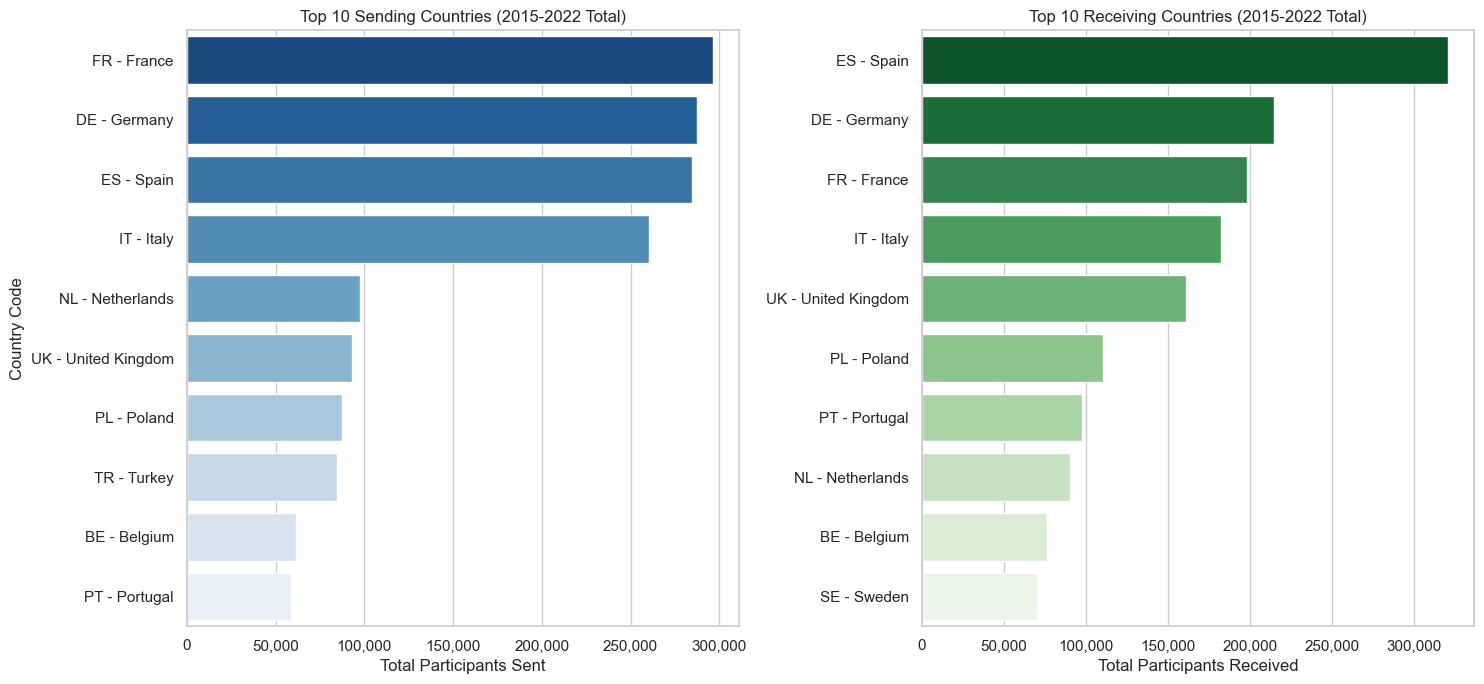

In [47]:
total_sending = df.groupby('sending_country')['participants_count'].sum().reset_index()
total_receiving = df.groupby('receiving_country')['participants_count'].sum().reset_index()

top_n = 10
top_sending_countries = total_sending.nlargest(top_n, 'participants_count').sort_values('participants_count', ascending=False)
top_receiving_countries = total_receiving.nlargest(top_n, 'participants_count').sort_values('participants_count', ascending=False)

# csv for easier access later (maybe)
# top_sending_countries.to_csv('data/top_sending_countries_total.csv', index=False)
# top_receiving_countries.to_csv('data/top_receiving_countries_total.csv', index=False)
# print(f"Top {top_n} sending countries saved to data/top_sending_countries_total.csv")
# print(f"Top {top_n} receiving countries saved to data/top_receiving_countries_total.csv")

fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=False) # 1 row, 2 cols

# Top Sending
sns.barplot(ax=axes[0], data=top_sending_countries, y='sending_country', x='participants_count', palette='Blues_r')
axes[0].set_title(f'Top {top_n} Sending Countries (2015-2022 Total)')
axes[0].set_xlabel('Total Participants Sent')
axes[0].set_ylabel('Country Code')
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ','))) # Comma format

# Top Receiving
sns.barplot(ax=axes[1], data=top_receiving_countries, y='receiving_country', x='participants_count', palette='Greens_r')
axes[1].set_title(f'Top {top_n} Receiving Countries (2015-2022 Total)')
axes[1].set_xlabel('Total Participants Received')
axes[1].set_ylabel('') # No label needed if side-by-side
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ','))) # Comma format

plt.tight_layout() 

output_image_path = r'finalproject_web\FrederikSartovOlsen.github.io\assets\top_countries_bar_charts.png'
output_dir = os.path.dirname(output_image_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir, exist_ok=True)
    print(f"Created directory (and any parents): {output_dir}")
else:
    print(f"Directory already exists: {output_dir}")

plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
print(f"Static bar plot saved successfully to {output_image_path}")
plt.show() 


# GEODATA NUTS 2021
The NUTS 2021 data was retrieved from: https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics

I do want to be transparent, I used LLM help here since the topic is very complex and specific. 

In [48]:
import pandas as pd
import geopandas as gpd
nuts_shapefile_path = r'C:\Users\Frederik\Desktop\NUTS\NUTS_RG_20M_2021_3035.shp' 

nuts_gdf = gpd.read_file(nuts_shapefile_path)
print("Successfully loaded NUTS shapefile.")
print("Original CRS:", nuts_gdf.crs)
print("NUTS GeoDataFrame columns:", nuts_gdf.columns)
print(nuts_gdf.head())

# Reproject to WGS84 (EPSG:4326) for latitude/longitude
nuts_gdf_wgs84 = nuts_gdf.to_crs(epsg=4326)
print("\nReprojected CRS:", nuts_gdf_wgs84.crs)

# Calculate centroids for each NUTS region
# The .centroid attribute gives the geometric center.
nuts_gdf_wgs84['centroid'] = nuts_gdf_wgs84.geometry.centroid

# Extract latitude and longitude from centroids
nuts_gdf_wgs84['longitude'] = nuts_gdf_wgs84['centroid'].x
nuts_gdf_wgs84['latitude'] = nuts_gdf_wgs84['centroid'].y

# List of potential column names based on Eurostat common practices
potential_id_col = next((col for col in ['NUTS_ID', 'id', 'NUTS_CODE'] if col in nuts_gdf_wgs84.columns), None)
potential_level_col = next((col for col in ['LEVL_CODE', 'STAT_LEVL_'] if col in nuts_gdf_wgs84.columns), None)
potential_cntr_col = next((col for col in ['CNTR_CODE', 'COUNTRY'] if col in nuts_gdf_wgs84.columns), None)
potential_name_col = next((col for col in ['NUTS_NAME', 'NAME_LATN'] if col in nuts_gdf_wgs84.columns), None)

nuts_centroids_df = nuts_gdf_wgs84[[
    potential_id_col,
    potential_level_col,
    potential_cntr_col,
    potential_name_col if potential_name_col else potential_id_col, # Use ID as name if no specific name col
    'latitude',
    'longitude'
]].copy() # Use .copy() to avoid SettingWithCopyWarning

# Rename for clarity and consistency
nuts_centroids_df.rename(columns={
    potential_id_col: 'nuts_id',
    potential_level_col: 'nuts_level',
    potential_cntr_col: 'nuts_country_code',
    potential_name_col if potential_name_col else potential_id_col : 'nuts_name'
}, inplace=True)


# Filter for a specific NUTS level if desired, e.g., NUTS2 or NUTS3
# NUTS level 0: Country, 1: Major regions, 2: Basic regions, 3: Small regions/provinces
# For heatmaps, NUTS2 or NUTS3 are generally good. Let's try NUTS2.
nuts_level_to_use = 2 # Or 3
nuts_geocodes = nuts_centroids_df[nuts_centroids_df['nuts_level'] == nuts_level_to_use].copy() # .copy()

print(f"\nPrepared NUTS{nuts_level_to_use} geocodes for merging:")
print(nuts_geocodes.head())
print(f"Number of NUTS{nuts_level_to_use} regions: {len(nuts_geocodes)}")


Successfully loaded NUTS shapefile.
Original CRS: EPSG:3035
NUTS GeoDataFrame columns: Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'geometry'],
      dtype='object')
  NUTS_ID  LEVL_CODE CNTR_CODE     NAME_LATN     NUTS_NAME  MOUNT_TYPE  \
0      FR          0        FR        France        France         0.0   
1      HR          0        HR      Hrvatska      Hrvatska         0.0   
2      HU          0        HU  Magyarország  Magyarország         0.0   
3      AL          0        AL     Shqipëria     Shqipëria         0.0   
4      AT          0        AT    Österreich    Österreich         0.0   

   URBN_TYPE  COAST_TYPE                                           geometry  
0          0           0  MULTIPOLYGON (((9954236.116 -3059379.316, 9961...  
1          0           0  MULTIPOLYGON (((4827385.889 2618351.326, 48483...  
2          0           0  POLYGON ((5160506.845 2894264.902, 5175139.635...  
3  

C:\Users\Frederik\AppData\Local\Temp\ipykernel_31988\3330645469.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nuts_gdf_wgs84['centroid'] = nuts_gdf_wgs84.geometry.centroid


# GEODATA LAU 2022

I have used LLM help here again for the LAU. 

In [49]:
import pandas as pd
import geopandas as gpd
import numpy as np # For np.nan

lau_shapefile_zip_path = r'C:\Users\Frederik\Desktop\LAU\LAU_RG_01M_2022_3035.shp.zip' 
lau_gdf = gpd.read_file(f"zip://{lau_shapefile_zip_path}")
print("Successfully loaded LAU shapefile.")
print("Original LAU CRS:", lau_gdf.crs)
print("LAU GeoDataFrame columns:", lau_gdf.columns)

# Reproject to WGS84 (EPSG:4326) for latitude/longitude
if lau_gdf.crs.to_epsg() != 4326: # Check if already WGS84
    if lau_gdf.crs.to_epsg() == 3035: # Specific check for known input CRS
            lau_gdf_wgs84 = lau_gdf.to_crs(epsg=4326)
            print("\nReprojected LAU to WGS84 (EPSG:4326).")
    else:
        print(f"\nWarning: LAU CRS is {lau_gdf.crs.to_epsg()}, not 3035 or 4326. Attempting reprojection to 4326.")
        lau_gdf_wgs84 = lau_gdf.to_crs(epsg=4326) # General attempt
else:
    lau_gdf_wgs84 = lau_gdf # Already in WGS84
    print("\nLAU GDF is already in WGS84 (EPSG:4326).")

# Calculate centroids for each LAU region
lau_gdf_wgs84['centroid'] = lau_gdf_wgs84.geometry.centroid

# Extract latitude and longitude from centroids
lau_gdf_wgs84['lau_longitude'] = lau_gdf_wgs84['centroid'].x
lau_gdf_wgs84['lau_latitude'] = lau_gdf_wgs84['centroid'].y

potential_lau_name_col = next((col for col in ['LAU_NAME', 'NAME_LATN', 'NAME'] if col in lau_gdf_wgs84.columns), None)
potential_cntr_col = next((col for col in ['CNTR_CODE', 'COUNTRY'] if col in lau_gdf_wgs84.columns), None)
potential_lau_id_col = next((col for col in ['LAU_ID', 'GISCO_ID'] if col in lau_gdf_wgs84.columns), None)

if not all([potential_lau_name_col, potential_cntr_col, potential_lau_id_col]):
    print("Relevant LAU columns found:")
    print(f"  LAU Name Column: {potential_lau_name_col}")
    print(f"  Country Code Column: {potential_cntr_col}")
    print(f"  LAU ID Column: {potential_lau_id_col}")
    raise ValueError("Could not find all necessary LAU columns (Name, Country Code, ID). Please inspect lau_gdf_wgs84.columns and adjust.")

lau_centroids_df = lau_gdf_wgs84[[
    potential_lau_id_col,
    potential_lau_name_col,
    potential_cntr_col,
    'lau_latitude',
    'lau_longitude'
]].copy() # Use .copy()

# Rename for clarity
lau_centroids_df.rename(columns={
    potential_lau_id_col: 'lau_id',
    potential_lau_name_col: 'lau_city_name', # This is the name we'll try to match
    potential_cntr_col: 'lau_country_code'
}, inplace=True)

# Normalize city names and country codes in LAU data for better matching
lau_centroids_df['lau_city_name_norm'] = lau_centroids_df['lau_city_name'].astype(str).str.lower().str.strip()
lau_centroids_df['lau_country_code'] = lau_centroids_df['lau_country_code'].astype(str).str.upper().str.strip()
# Remove duplicate city name / country code pairs in LAU, keeping one (e.g. first)
# This can happen if a city name is ambiguous or if LAU has sub-units with same name
# Prioritize distinct city name + country code. If still duplicates, might need more logic.
lau_centroids_df = lau_centroids_df.drop_duplicates(subset=['lau_city_name_norm', 'lau_country_code'])
print(f"\nPrepared LAU centroids for merging ({len(lau_centroids_df)} entries):")
print(lau_centroids_df.head())



Successfully loaded LAU shapefile.
Original LAU CRS: EPSG:3035
LAU GeoDataFrame columns: Index(['GISCO_ID', 'CNTR_CODE', 'LAU_ID', 'LAU_NAME', 'POP_2022', 'POP_DENS_2',
       'AREA_KM2', 'YEAR', 'geometry'],
      dtype='object')

Reprojected LAU to WGS84 (EPSG:4326).


C:\Users\Frederik\AppData\Local\Temp\ipykernel_31988\675029602.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lau_gdf_wgs84['centroid'] = lau_gdf_wgs84.geometry.centroid



Prepared LAU centroids for merging (92368 entries):
  lau_id          lau_city_name lau_country_code  lau_latitude  lau_longitude  \
0  10905         Großpetersdorf               AT     47.238447      16.329189   
1  10910  Loipersdorf-Kitzladen               AT     47.336782      16.071350   
2  10911             Mariasdorf               AT     47.372294      16.242484   
3  10912           Markt Allhau               AT     47.299735      16.102834   
4  10914            Mischendorf               AT     47.204087      16.296205   

      lau_city_name_norm  
0         großpetersdorf  
1  loipersdorf-kitzladen  
2             mariasdorf  
3           markt allhau  
4            mischendorf  


In [ ]:
# After loading lau_centroids_df
if not lau_centroids_df.empty:
    unique_lau_country_codes = set(lau_centroids_df['lau_country_code'].unique())
    print(f"\nUnique country codes found in LAU data (sample): {list(unique_lau_country_codes)[:]}")
else:
    unique_lau_country_codes = set() # Empty set if LAU fails to load

def extract_erasmus_country_code_revised(country_field_val):
    if pd.isna(country_field_val) or not isinstance(country_field_val, str):
        return None
    
    parts = country_field_val.split(' - ')
    code = parts[0].strip().upper()
    
    # Specific known mappings or adjustments if needed
    # Example: Erasmus might use 'UK' but LAU uses 'GB' (less common now, Eurostat tends to use UK)
    # if code == 'UK' and 'GB' in unique_lau_country_codes and 'UK' not in unique_lau_country_codes:
    #     code = 'GB'
    # Example: Erasmus might use 'GR' but LAU uses 'EL' for Greece
    if code == 'GR' and 'EL' in unique_lau_country_codes: # GR is ISO, EL is Eurostat
        code = 'EL'
    return code

df['sending_country_iso'] = df['sending_country'].apply(extract_erasmus_country_code_revised)
df['receiving_country_iso'] = df['receiving_country'].apply(extract_erasmus_country_code_revised)

# Normalize city names from Erasmus data
df['sending_city_norm'] = df['sending_city'].astype(str).str.lower().str.strip()
df['receiving_city_norm'] = df['receiving_city'].astype(str).str.lower().str.strip()

print("\nErasmus DataFrame with normalized city/country for LAU matching (revised country codes):")
print(df[['sending_city', 'sending_city_norm', 'sending_country_iso']].head())


Unique country codes found in LAU data (sample): ['SK', 'AT', 'SE', 'NO', 'IS', 'RS', 'AL', 'ES', 'BE', 'BG', 'LU', 'HR', 'MK', 'DE', 'LT', 'SI', 'FI', 'CZ', 'PT', 'PL', 'LI', 'CY', 'RO', 'DK', 'UN', 'MT', 'EL', 'LV', 'EE', 'NL', 'FR', 'IE', 'HU', 'CH', 'IT']

Erasmus DataFrame with normalized city/country for LAU matching (revised country codes):
      sending_city sending_city_norm sending_country_iso
0  Villach Warmbad   villach warmbad                  AT
1  Villach Warmbad   villach warmbad                  AT
2  Villach Warmbad   villach warmbad                  AT
3  Villach Warmbad   villach warmbad                  AT
4  Villach Warmbad   villach warmbad                  AT


In [51]:
if not lau_centroids_df.empty:
    # Columns that will be generated by this LAU merge process
    lau_generated_cols_sending = ['sending_latitude', 'sending_longitude', 'sending_lau_id']
    lau_generated_cols_receiving = ['receiving_latitude', 'receiving_longitude', 'receiving_lau_id']
    all_lau_generated_cols = lau_generated_cols_sending + lau_generated_cols_receiving

    # Create a working copy of df. We'll drop columns from this copy.
    df_for_lau_merge = df.copy()

    # Identify and drop any of these LAU-generated columns if they already exist in our working copy.
    # This prevents pandas from creating _x, _y suffixed columns during the merge.
    # The LAU merge will then (re)create these columns cleanly.
    cols_to_drop_from_working_df = [col for col in all_lau_generated_cols if col in df_for_lau_merge.columns]
    if cols_to_drop_from_working_df:
        print(f"Note: Dropping existing columns from working df before LAU merge to avoid conflicts: {cols_to_drop_from_working_df}")
        df_for_lau_merge.drop(columns=cols_to_drop_from_working_df, inplace=True)

    # --- Start of your "Clean slate" logic, using df_for_lau_merge ---
    # Merge for sending locations
    df_temp_sending = pd.merge(
        df_for_lau_merge, # Use the df copy that had potentially conflicting columns removed
        lau_centroids_df[['lau_city_name_norm', 'lau_country_code', 'lau_latitude', 'lau_longitude', 'lau_id']].rename(
            columns={'lau_latitude': 'sending_latitude', 'lau_longitude': 'sending_longitude', 'lau_id': 'sending_lau_id'}
        ),
        left_on=['sending_city_norm', 'sending_country_iso'],
        right_on=['lau_city_name_norm', 'lau_country_code'],
        how='left'
    ).drop(columns=['lau_city_name_norm', 'lau_country_code'], errors='ignore') # Drop merge key cols from right table

    # Merge for receiving locations
    df_geocoded_final = pd.merge(
        df_temp_sending,
        lau_centroids_df[['lau_city_name_norm', 'lau_country_code', 'lau_latitude', 'lau_longitude', 'lau_id']].rename(
            columns={'lau_latitude': 'receiving_latitude', 'lau_longitude': 'receiving_longitude', 'lau_id': 'receiving_lau_id'}
        ),
        left_on=['receiving_city_norm', 'receiving_country_iso'],
        right_on=['lau_city_name_norm', 'lau_country_code'],
        how='left'
    ).drop(columns=['lau_city_name_norm', 'lau_country_code'], errors='ignore') # Drop merge key cols from right table
    # --- End of your "Clean slate" logic ---

    # Check matching success
    # These lines should now work because 'sending_latitude' etc. will exist without suffixes.
    total_rows = len(df_geocoded_final)
    matched_sending = df_geocoded_final['sending_latitude'].notna().sum()
    matched_receiving = df_geocoded_final['receiving_latitude'].notna().sum()

    print(f"\nLAU Geocoding results:")
    print(f"Successfully geocoded {matched_sending}/{total_rows} sending locations via LAU.")
    print(f"Successfully geocoded {matched_receiving}/{total_rows} receiving locations via LAU.")

    # Identify some unmatched cities for review
    # Ensure 'sending_city' is in df_geocoded_final, or adjust if it was only in the original df and not carried over.
    # Based on your merge logic, columns from the original df (via df_for_lau_merge) should be present.
    if 'sending_city' in df_geocoded_final.columns: # Add check for 'sending_city'
        unmatched_sending_sample = df_geocoded_final[df_geocoded_final['sending_latitude'].isna()][
            ['sending_city', 'sending_city_norm', 'sending_country_iso']
        ].drop_duplicates().head(10)
        if not unmatched_sending_sample.empty:
            print("\nSample unmatched sending cities (LAU):")
            print(unmatched_sending_sample)
    else:
        print("\nWarning: 'sending_city' column not found in df_geocoded_final. Cannot show unmatched sending cities sample.")
    
    # This is now your primary geocoded dataframe
    df = df_geocoded_final.copy() # Update the main df variable

else:
    print("\nSkipping LAU geocoding merge as LAU centroids data is not loaded.")
    # Ensure lat/lon columns exist if LAU processing was skipped, to prevent errors downstream
    # This part is fine, it initializes columns if they don't exist at all.
    if 'sending_latitude' not in df.columns: df['sending_latitude'] = np.nan
    if 'sending_longitude' not in df.columns: df['sending_longitude'] = np.nan
    if 'sending_lau_id' not in df.columns: df['sending_lau_id'] = pd.NA # Or np.nan, depending on preferred NA type for IDs
    if 'receiving_latitude' not in df.columns: df['receiving_latitude'] = np.nan
    if 'receiving_longitude' not in df.columns: df['receiving_longitude'] = np.nan
    if 'receiving_lau_id' not in df.columns: df['receiving_lau_id'] = pd.NA

# print("\nFinal df columns after LAU processing:")
print(df.columns)



LAU Geocoding results:
Successfully geocoded 1006561/2324317 sending locations via LAU.
Successfully geocoded 959206/2324317 receiving locations via LAU.

Sample unmatched sending cities (LAU):
                   sending_city          sending_city_norm sending_country_iso
0               Villach Warmbad            villach warmbad                  AT
11                St. Veit/Glan              st. veit/glan                  AT
17                 Spittal/Drau               spittal/drau                  AT
44                    ST. Jakob                  st. jakob                  AT
54                        KREMS                      krems                  AT
592                  KLAGENFURT                 klagenfurt                  AT
858                   ST POLTEN                  st polten                  AT
2147                     VIENNA                     vienna                  AT
2903  KLAGENFURT AM WÃRTHERSEE  klagenfurt am wãrthersee                  AT
2904           

In [ ]:
import re
from unidecode import unidecode

# Load lau_centroids_df and df as before
def advanced_normalize_city_name(city_name):
    if pd.isna(city_name):
        return None
    
    name = str(city_name).lower().strip()
    
    # 1. Specific known translations (add more as needed)
    translations = {
        "vienna": "wien",
        "rome": "roma",
        "prague": "praha",
        "cologne": "köln", # or koeln if using unidecode later
        "munich": "münchen", # or muenchen
        "florence": "firenze",
        "the hague": "den haag",
        "s hertogenbosch": "den bosch", # Common variations
        "'s-hertogenbosch": "den bosch",
        # Add Austrian specific examples based on your unmatched list
        "st polten": "sankt pölten", # or sankt poelten
        "st. polten": "sankt pölten",
        "st veit/glan": "sankt veit an der glan", # Try more specific if possible
        "st. veit/glan": "sankt veit an der glan",
        "klagenfurt": "klagenfurt am wörthersee", # LAU might have the full name
        "krems": "krems an der donau"
    }
    if name in translations:
        name = translations[name]

    # 2. Standardize "St." and "Sankt"
    name = name.replace("st.", "sankt ") # Add space for words like "sankt pölten"
    name = name.replace("st ", "sankt ") # For cases like "st jakob"

    # 3. Remove punctuation (except for specific cases you want to keep, e.g. hyphens in some names)
    # This regex keeps letters, numbers, spaces, and common diacritics. Adjust if too aggressive.
    name = re.sub(r"[^\w\säöüßàâæçéèêëîïôœùûüÿøåæđłńřśšľžțșÞþð]", "", name, flags=re.UNICODE)
    # Simpler punctuation removal:
    # name = re.sub(r"[/.,()]", " ", name) # Replace punctuation with space

    # 4. Attempt to strip common suffixes (add more as identified)
    # Order matters if suffixes can be substrings of others
    suffixes_to_strip = [
        " an der glan", " an der drau", " am wörthersee", " an der donau",
        " warmbad", " im breisgau", " am main", " upon avon"
    ]
    for suffix in suffixes_to_strip:
        if name.endswith(suffix):
            name = name[:-len(suffix)].strip()
            break # Remove one suffix and stop, to avoid over-stripping

    # 5. Normalize whitespace (multiple spaces to one)
    name = re.sub(r"\s+", " ", name).strip()
    
    return name

# Apply normalization for the city names
if not lau_centroids_df.empty:
    # Keep the original LAU name for reference
    lau_centroids_df['lau_city_name_original'] = lau_centroids_df['lau_city_name']
    lau_centroids_df['lau_city_name_norm'] = lau_centroids_df['lau_city_name_original'].apply(advanced_normalize_city_name)
    # Also normalize country code (though it's usually fine)
    lau_centroids_df['lau_country_code'] = lau_centroids_df['lau_country_code'].astype(str).str.upper().str.strip()
    
    # Create an unidecoded version for secondary matching
    lau_centroids_df['lau_city_name_norm_ascii'] = lau_centroids_df['lau_city_name_norm'].astype(str).apply(unidecode)

    # Drop duplicates based on the new normalized names + country
    lau_centroids_df = lau_centroids_df.drop_duplicates(subset=['lau_city_name_norm', 'lau_country_code'])
    # And potentially on ascii version if you use that as primary key
    # lau_centroids_df = lau_centroids_df.drop_duplicates(subset=['lau_city_name_norm_ascii', 'lau_country_code'])
    
    print(f"\nPrepared LAU centroids with ADVANCED normalization ({len(lau_centroids_df)} entries):")
    print(lau_centroids_df[['lau_city_name_original', 'lau_city_name_norm', 'lau_city_name_norm_ascii', 'lau_country_code']].head())
else:
    print("LAU centroids DataFrame is empty. Skipping advanced normalization for LAU.")

# Apply the same advanced normalization and revised country code extraction
df['sending_country_iso'] = df['sending_country'].apply(extract_erasmus_country_code_revised) # Use the revised one
df['receiving_country_iso'] = df['receiving_country'].apply(extract_erasmus_country_code_revised)

# Keep original for reference
df['sending_city_original'] = df['sending_city']
df['receiving_city_original'] = df['receiving_city']

df['sending_city_norm'] = df['sending_city_original'].apply(advanced_normalize_city_name)
df['receiving_city_norm'] = df['receiving_city_original'].apply(advanced_normalize_city_name)

# Create unidecoded versions for secondary matching
df['sending_city_norm_ascii'] = df['sending_city_norm'].astype(str).apply(unidecode)
df['receiving_city_norm_ascii'] = df['receiving_city_norm'].astype(str).apply(unidecode)


print("\nErasmus DataFrame with ADVANCED normalized city/country for LAU matching:")
print(df[['sending_city_original', 'sending_city_norm', 'sending_city_norm_ascii', 'sending_country_iso']].head())


Prepared LAU centroids with ADVANCED normalization (92354 entries):
  lau_city_name_original    lau_city_name_norm lau_city_name_norm_ascii  \
0         Großpetersdorf        großpetersdorf          grosspetersdorf   
1  Loipersdorf-Kitzladen  loipersdorfkitzladen     loipersdorfkitzladen   
2             Mariasdorf            mariasdorf               mariasdorf   
3           Markt Allhau          markt allhau             markt allhau   
4            Mischendorf           mischendorf              mischendorf   

  lau_country_code  
0               AT  
1               AT  
2               AT  
3               AT  
4               AT  

Erasmus DataFrame with ADVANCED normalized city/country for LAU matching:
  sending_city_original sending_city_norm sending_city_norm_ascii  \
0       Villach Warmbad           villach                 villach   
1       Villach Warmbad           villach                 villach   
2       Villach Warmbad           villach                 villach   
3  

In [ ]:
df = df.reset_index().rename(columns={'index': 'original_index'}) # Keep track of original order

# Initialize geocoding columns in the main df
df['sending_latitude'] = np.nan
df['sending_longitude'] = np.nan
df['sending_lau_id'] = pd.NA # Use pandas NA for object types if lau_id is string
df['geocoded_by_pass_sending'] = pd.NA

df['receiving_latitude'] = np.nan
df['receiving_longitude'] = np.nan
df['receiving_lau_id'] = pd.NA
df['geocoded_by_pass_receiving'] = pd.NA

if not lau_centroids_df.empty:
    def apply_merge_pass(main_df, key_cols_main,
                         lau_df_subset, key_cols_lau,
                         lat_col_name, lon_col_name, id_col_name, pass_name_col, pass_id_str,
                         is_sending=True):
        
        target_lat = 'sending_latitude' if is_sending else 'receiving_latitude'
        target_lon = 'sending_longitude' if is_sending else 'receiving_longitude'
        target_id = 'sending_lau_id' if is_sending else 'receiving_lau_id'
        target_pass = 'geocoded_by_pass_sending' if is_sending else 'geocoded_by_pass_receiving'

        # Merge only the rows in main_df that are not yet geocoded for this type (sending/receiving)
        unmatched_df_indices = main_df[main_df[target_lat].isna()].index
        if unmatched_df_indices.empty:
            print(f"No unmatched rows for {target_lat} before {pass_id_str}.")
            return main_df

        # Prepare a subset of main_df for merging
        df_to_merge = main_df.loc[unmatched_df_indices, ['original_index'] + key_cols_main].copy()

        merged_data = pd.merge(
            df_to_merge,
            lau_df_subset, # Use the pre-filtered LAU subset for this pass
            left_on=key_cols_main,
            right_on=key_cols_lau,
            how='left',
            suffixes=('', '_lau')
        ).dropna(subset=[lat_col_name]) # Keep only successful matches from this pass

        if not merged_data.empty:
            # Set index to original_index for efficient update
            merged_data = merged_data.set_index('original_index')
            
            # This ensures we only update rows that were part of this successful merge pass and were previously NaN.
            main_df.loc[merged_data.index, target_lat] = merged_data[lat_col_name]
            main_df.loc[merged_data.index, target_lon] = merged_data[lon_col_name]
            main_df.loc[merged_data.index, target_id] = merged_data[id_col_name]
            main_df.loc[merged_data.index, target_pass] = pass_id_str
            
        print(f"After {pass_id_str} ({'sending' if is_sending else 'receiving'}): {main_df[target_lat].notna().sum()} geocoded.")
        return main_df

    # Prepare LAU subsets for different passes (to avoid repeated column renaming) 
    lau_pass1_subset = lau_centroids_df[['lau_city_name_norm', 'lau_country_code', 'lau_latitude', 'lau_longitude', 'lau_id']].copy()
    lau_pass2_subset = lau_centroids_df[['lau_city_name_norm_ascii', 'lau_country_code', 'lau_latitude', 'lau_longitude', 'lau_id']].copy()

    # SENDING LOCATIONS 
    print("\n--- Geocoding Sending Locations ---")

    # Pass 1: Normalized with diacritics
    df = apply_merge_pass(df, ['sending_city_norm', 'sending_country_iso'],
                          lau_pass1_subset, ['lau_city_name_norm', 'lau_country_code'],
                          'lau_latitude', 'lau_longitude', 'lau_id', 'geocoded_by_pass_sending', 'pass1_norm_send',
                          is_sending=True)

    # Pass 2: ASCII normalized
    df = apply_merge_pass(df, ['sending_city_norm_ascii', 'sending_country_iso'],
                          lau_pass2_subset, ['lau_city_name_norm_ascii', 'lau_country_code'],
                          'lau_latitude', 'lau_longitude', 'lau_id', 'geocoded_by_pass_sending', 'pass2_ascii_send',
                          is_sending=True)

    # --- RECEIVING LOCATIONS ---
    print("\n--- Geocoding Receiving Locations ---")
    # Pass 1: Normalized with diacritics
    df = apply_merge_pass(df, ['receiving_city_norm', 'receiving_country_iso'],
                          lau_pass1_subset, ['lau_city_name_norm', 'lau_country_code'],
                          'lau_latitude', 'lau_longitude', 'lau_id', 'geocoded_by_pass_receiving', 'pass1_norm_recv',
                          is_sending=False)

    # Pass 2: ASCII normalized
    df = apply_merge_pass(df, ['receiving_city_norm_ascii', 'receiving_country_iso'],
                          lau_pass2_subset, ['lau_city_name_norm_ascii', 'lau_country_code'],
                          'lau_latitude', 'lau_longitude', 'lau_id', 'geocoded_by_pass_receiving', 'pass2_ascii_recv',
                          is_sending=False)
    
    # Final Check
    df = df.set_index('original_index').sort_index() # Restore original index and order

    total_rows = len(df)
    matched_sending_final = df['sending_latitude'].notna().sum()
    matched_receiving_final = df['receiving_latitude'].notna().sum()

    print(f"\nFinal LAU Geocoding results after optimized multi-pass:")
    print(f"Successfully geocoded {matched_sending_final}/{total_rows} sending locations via LAU.")
    print(f"Successfully geocoded {matched_receiving_final}/{total_rows} receiving locations via LAU.")

    unmatched_sending_sample_final = df[df['sending_latitude'].isna()][
        ['sending_city_original', 'sending_city_norm', 'sending_city_norm_ascii', 'sending_country_iso']
    ].drop_duplicates().head(20)
    if not unmatched_sending_sample_final.empty:
        print("\nSample UNMATCHED sending cities (after multi-pass LAU):")
        print(unmatched_sending_sample_final)
else:
    print("LAU centroids DataFrame is empty. Skipping multi-pass merge.")
    # Restore index if it was reset
    if 'original_index' in df.columns:
        df = df.set_index('original_index').sort_index()


--- Geocoding Sending Locations ---
After pass1_norm_send (sending): 1022454 geocoded.
After pass2_ascii_send (sending): 1192114 geocoded.

--- Geocoding Receiving Locations ---
After pass1_norm_recv (receiving): 977144 geocoded.
After pass2_ascii_recv (receiving): 1174896 geocoded.

Final LAU Geocoding results after optimized multi-pass:
Successfully geocoded 1192114/2324317 sending locations via LAU.
Successfully geocoded 1174896/2324317 receiving locations via LAU.

Sample UNMATCHED sending cities (after multi-pass LAU):
                    sending_city_original         sending_city_norm  \
original_index                                                        
17                           Spittal/Drau               spittaldrau   
44                              ST. Jakob               sankt jakob   
2903            KLAGENFURT AM WÃRTHERSEE  klagenfurt am wãrthersee   
2957                        Sankt PÃ¶lten              sankt pãlten   
3397                                 GÃ¶d  

# I used geopy here to get the more accurate geocoding.
Again I used LLM help here to ensure to ensure functionality due to the complex task of getting it for data points. 
It is a very time consuming process, this took around 2 hours of running for it to get to this result

In [ ]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Initialize geolocator and cache outside function for persistence if running interactively
geolocator = Nominatim(user_agent="erasmus_data_analyzer_fherolt@gmail.com_v3") 
geocode_limited = RateLimiter(geolocator.geocode, min_delay_seconds=1, error_wait_seconds=10.0, max_retries=2, swallow_exceptions=True)
geocode_cache = {} # To store results and avoid re-querying the same location

def apply_geopy_fallback_optimized_update(df_to_update, city_col_original, country_code_col, lat_col, lon_col, pass_name_col, pass_id_str, is_sending=True, geocode_cache_loaded=None):
    """
    Optimized update part for apply_geopy_fallback.
    Assumes geocode_cache_loaded contains all geocoding attempts (Location objects or None).
    """
    if geocode_cache_loaded is None:
        print("Error: geocode_cache_loaded is required.")
        return df_to_update

    target_pass_col = 'geocoded_by_pass_sending' if is_sending else 'geocoded_by_pass_receiving'
    
    # Identify rows that were originally NaN and need updating
    rows_to_update_mask = df_to_update[lat_col].isna()
    if not rows_to_update_mask.any():
        print(f"No rows to update for {lat_col} based on NaNs.")
        return df_to_update
        
    # Create the lookup keys for the rows that need updating
    # Important: Only create keys for rows that are currently NaN for this lat_col
    lookup_keys = pd.Series(zip(
        df_to_update.loc[rows_to_update_mask, city_col_original].astype(str).str.strip(),
        df_to_update.loc[rows_to_update_mask, country_code_col].astype(str).str.strip()
    ), index=df_to_update.loc[rows_to_update_mask].index) # Keep original index

    # Map the geocode_cache to these lookup keys
    # geocode_cache stores the Location object or None. We need to extract lat/lon.
    def get_coords_from_cache(key):
        location_obj = geocode_cache_loaded.get(key)
        if location_obj: # Check if it's a valid Location object
            return pd.Series([location_obj.latitude, location_obj.longitude, pass_id_str])
        return pd.Series([np.nan, np.nan, pd.NA]) # Return NaNs and NA for pass if no valid object

    # Apply the mapping
    # This will return a DataFrame with new_lat, new_lon, new_pass columns, aligned to lookup_keys.index
    mapped_values_df = lookup_keys.apply(get_coords_from_cache)
    mapped_values_df.columns = ['new_lat', 'new_lon', 'new_pass']

    # Update the original DataFrame using .loc and the index
    # Only update where mapped_values_df provided actual coordinates (not NaN)
    valid_mapped_indices = mapped_values_df['new_lat'].notna()
    
    df_to_update.loc[mapped_values_df.index[valid_mapped_indices], lat_col] = mapped_values_df.loc[valid_mapped_indices, 'new_lat']
    df_to_update.loc[mapped_values_df.index[valid_mapped_indices], lon_col] = mapped_values_df.loc[valid_mapped_indices, 'new_lon']
    df_to_update.loc[mapped_values_df.index[valid_mapped_indices], target_pass_col] = mapped_values_df.loc[valid_mapped_indices, 'new_pass']
    
    update_count = valid_mapped_indices.sum()
    print(f"Updated {update_count} rows via Geopy (optimized map) for {'sending' if is_sending else 'receiving'}.")
    print(f"Total geocoded for {lat_col} after Geopy: {df_to_update[lat_col].notna().sum()}/{len(df_to_update)}")
    
    return df_to_update


import pickle
cache_filename = 'geocode_cache.pkl' 
try:
    with open(cache_filename, 'rb') as f:
        geocode_cache_loaded = pickle.load(f)
    print(f"Successfully loaded geocode_cache from {cache_filename}. Length: {len(geocode_cache_loaded)}")
except Exception as e:
    print(f"Error loading geocode_cache: {e}. Cannot proceed with optimized update.")


print("\n--- Applying Geopy Fallback (Optimized Update) ---")
df = apply_geopy_fallback_optimized_update(df,
                                           city_col_original='sending_city_original',
                                           country_code_col='sending_country_iso',
                                           lat_col='sending_latitude',
                                           lon_col='sending_longitude',
                                           pass_name_col='geocoded_by_pass_sending', # Column name in df for pass info
                                           pass_id_str='geopy_send_opt',
                                           is_sending=True,
                                           geocode_cache_loaded=geocode_cache_loaded)

# 4. Call for RECEIVING locations:
df = apply_geopy_fallback_optimized_update(df,
                                           city_col_original='receiving_city_original',
                                           country_code_col='receiving_country_iso',
                                           lat_col='receiving_latitude',
                                           lon_col='receiving_longitude',
                                           pass_name_col='geocoded_by_pass_receiving', # Column name in df for pass info
                                           pass_id_str='geopy_recv_opt',
                                           is_sending=False,
                                           geocode_cache_loaded=geocode_cache_loaded)
df.to_csv('erasmus_data_fully_geocoded.csv', index=False)

Successfully loaded geocode_cache from geocode_cache.pkl. Length: 6564

--- Applying Geopy Fallback (Optimized Update) ---
Updated 818542 rows via Geopy (optimized map) for sending.
Total geocoded for sending_latitude after Geopy: 2190149/2324317
Updated 869063 rows via Geopy (optimized map) for receiving.
Total geocoded for receiving_latitude after Geopy: 2043959/2324317


# After fully geocoding the missing cordinates

In [ ]:
# This is now the full dataset we'll use for the rest. 

import pandas as pd
df = pd.read_csv('erasmus_data_fully_geocoded.csv', low_memory=False)

# Sanity check.. 
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.dropna(subset=['year'], inplace=True) 
df['year'] = df['year'].astype(int)
df['participants_count'] = pd.to_numeric(df['participants_count'], errors='coerce').fillna(0).astype(int)

In [ ]:
df.columns

Index(['unnamed:_0', 'project_reference', 'academic_year', 'mobility_duration',
       'activity_(mob)', 'field', 'field_of_education', 'participant_country',
       'education_level', 'participant_gender', 'participant_profile',
       'fewer_opportunities', 'participant_age', 'sending_country',
       'sending_city', 'sending_organisation', 'receiving_country',
       'receiving_city', 'receiving_organisation', 'actual_participants',
       'actual_participants_(contracted_projects)', 'year', 'mov_type',
       'mobility_start_date', 'mobility_duration_clean', 'participants_count',
       'gender_cleaned', 'sending_country_iso', 'receiving_country_iso',
       'sending_city_norm', 'receiving_city_norm', 'sending_latitude',
       'sending_longitude', 'sending_lau_id', 'receiving_latitude',
       'receiving_longitude', 'receiving_lau_id', 'sending_city_original',
       'receiving_city_original', 'sending_city_norm_ascii',
       'receiving_city_norm_ascii', 'geocoded_by_pass_sending

# Visualizing the flow from each country

In [ ]:
import numpy as np
import folium
import os

df = pd.read_csv('erasmus_data_fully_geocoded.csv', low_memory=False)

required_cols = ['year', 'participants_count',
                    'sending_country_iso', 'receiving_country_iso',
                    'gender_cleaned']  

for col in required_cols:
    if col not in df.columns:
        print(f"FATAL ERROR: Column '{col}' missing from erasmus_data_fully_geocoded.csv")
        exit()
    if col in ['year', 'participants_count']:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    elif 'iso' in col or col == 'gender_cleaned': # gender_cleaned is likely string
        df[col] = df[col].fillna('Unknown').astype(str)

print("Main geocoded DataFrame loaded and checked.")

# Country mapping for look up
country_name_map = {
    'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'HR': 'Croatia', 'CY': 'Cyprus',
    'CZ': 'Czechia', 'DK': 'Denmark', 'EE': 'Estonia', 'FI': 'Finland', 'FR': 'France',
    'DE': 'Germany', 'EL': 'Greece', 'GR': 'Greece', # GR is often used, EL is Eurostat
    'HU': 'Hungary', 'IS': 'Iceland', 'IE': 'Ireland',
    'IT': 'Italy', 'LV': 'Latvia', 'LI': 'Liechtenstein', 'LT': 'Lithuania', 'LU': 'Luxembourg',
    'MT': 'Malta', 'NL': 'Netherlands', 'NO': 'Norway', 'PL': 'Poland', 'PT': 'Portugal',
    'RO': 'Romania', 'RS': 'Serbia', 'SK': 'Slovakia', 'SI': 'Slovenia', 'ES': 'Spain',
    'SE': 'Sweden', 'CH': 'Switzerland', 'TR': 'Türkiye',
    'GB': 'United Kingdom', 'UK': 'United Kingdom',
    'MK': 'North Macedonia',
    'GE': 'Georgia', 'AL': 'Albania', 'BY': 'Belarus', 'RU': 'Russia', 
    'UA': 'Ukraine', 'AM': 'Armenia', 'BA': 'Bosnia and Herzegovina',
    'TN': 'Tunisia', 'IL': 'Israel', 'MD': 'Moldova', 
    'EG': 'Egypt', 'ME': 'Montenegro', 'AZ': 'Azerbaijan', 'JO': 'Jordan',
    'PS': 'Palestine', 'XK': 'Kosovo', 'DZ': 'Algeria', 'MA': 'Morocco',
    'KR': 'South Korea', 
    'CN': "China", 
    'ID': 'Indonesia', 'CA': 'Canada', 'AU': 'Australia', 'TH': 'Thailand',
    'US': 'United States', 'BR': 'Brazil', 'KG': 'Kyrgyzstan',
    'KZ': 'Kazakhstan', 'UY': 'Uruguay', 'LB': 'Lebanon', 'AR': 'Argentina',
    'VN': 'Vietnam', 'JP': 'Japan', 'NZ': 'New Zealand', 'TW': 'Taiwan',
    'NP': 'Nepal', 'MY': 'Malaysia', 'IN': 'India', 'SG': 'Singapore',
    'ZA': 'South Africa', 'CU': 'Cuba', 'CL': 'Chile', 'CO': 'Colombia',
    'PH': 'Philippines', 'HK': 'Hong Kong', 'MX': 'Mexico', 'MN': 'Mongolia',
    'NI': 'Nicaragua', 'BT': 'Bhutan', 'CR': 'Costa Rica', 'PE': 'Peru',
    'UZ': 'Uzbekistan', 'PY': 'Paraguay', 'PK': 'Pakistan', 'EC': 'Ecuador',
    'SY': 'Syria', 
    'TJ': 'Tajikistan', 'KH': 'Cambodia',
    'LA': "Laos", 
    'MM': 'Myanmar', 'HN': 'Honduras', 'LK': 'Sri Lanka', 'SV': 'El Salvador',
    'GT': 'Guatemala', 'AF': 'Afghanistan', 'BD': 'Bangladesh', 'MO': 'Macao',
    'LY': 'Libya', 'TZ': 'Tanzania', 
    'ET': 'Ethiopia', 'NA': 'Namibia', 'UG': 'Uganda', 'GA': 'Gabon',
    'VE': 'Venezuela', 'BF': 'Burkina Faso', 'MG': 'Madagascar', 'PA': 'Panama',
    'GH': 'Ghana', 'TT': 'Trinidad and Tobago', 'BO': 'Bolivia',
    'DO': 'Dominican Republic', 'KE': 'Kenya', 'BJ': 'Benin', 'CM': 'Cameroon',
    'MU': 'Mauritius', 'BZ': 'Belize', 'PG': 'Papua New Guinea',
    'MR': 'Mauritania', 'SN': 'Senegal', 'AO': 'Angola', 'BB': 'Barbados',
    'ZM': 'Zambia', 'JM': 'Jamaica', 'HT': 'Haiti', "CI": "Côte d'Ivoire",
    'ML': 'Mali', 'MZ': 'Mozambique', 'SR': 'Suriname', 'TL': 'Timor-Leste',
    'NE': 'Niger', 'SD': 'Sudan', 'CF': 'Central African Republic',
    'MW': 'Malawi', 'IR': 'Iran', 
    'NG': 'Nigeria', 'FJ': 'Fiji', 'BN': 'Brunei', 
    'TG': 'Togo', 'CV': 'Cape Verde', 'GM': 'Gambia', 'RW': 'Rwanda',
    'CD': 'DR Congo', 
    'TM': 'Turkmenistan', 'IQ': 'Iraq', 'BW': 'Botswana', 'LS': 'Lesotho',
    'ZW': 'Zimbabwe', 'GQ': 'Equatorial Guinea', 'BI': 'Burundi', 'GN': 'Guinea',
    'KM': 'Comoros', 'GW': 'Guinea-Bissau', 'CG': 'Congo (Republic of)',
    'LR': 'Liberia', 'MV': 'Maldives', 'ST': 'Sao Tome and Principe',
    'SO': 'Somalia',
    'FO': 'Faroe Islands',
    'SZ': 'Eswatini', 
    'CW': 'Curaçao',
    'MC': 'Monaco',
    'GL': 'Greenland',
    'BH': 'Bahrain',
    'QA': 'Qatar',
    'AW': 'Aruba',
    'AE': 'United Arab Emirates',
    'AD': 'Andorra',
    'SL': 'Sierra Leone',
    'GD': 'Grenada',
    'LC': 'Saint Lucia',
    'KP': 'North Korea', 
    'CK': 'Cook Islands',
}

# Verification of ISO. 
unique_iso_codes_in_data_send = set(df['sending_country_iso'].unique())
unique_iso_codes_in_data_recv = set(df['receiving_country_iso'].unique())
all_unique_iso_codes = unique_iso_codes_in_data_send.union(unique_iso_codes_in_data_recv)
for code in all_unique_iso_codes:
    if code not in country_name_map and code != 'Unknown':
        print(f"Warning: Country ISO code '{code}' from your data is not in country_name_map.")


# Capital City Coordinates for each country in the programme, 
# since I want to have the interactive map over the capital. 
# https://gist.github.com/ofou/df09a6834a8421b4f376c875194915c9
capital_coords = {
    # Europe
    'AT': {'name': 'Vienna', 'lat': 48.2082, 'lon': 16.3738},
    'BE': {'name': 'Brussels', 'lat': 50.8503, 'lon': 4.3517},
    'BG': {'name': 'Sofia', 'lat': 42.6977, 'lon': 23.3219},
    'HR': {'name': 'Zagreb', 'lat': 45.8150, 'lon': 15.9819},
    'CY': {'name': 'Nicosia', 'lat': 35.1856, 'lon': 33.3823},
    'CZ': {'name': 'Prague', 'lat': 50.0755, 'lon': 14.4378},
    'DK': {'name': 'Copenhagen', 'lat': 55.6761, 'lon': 12.5683},
    'EE': {'name': 'Tallinn', 'lat': 59.4370, 'lon': 24.7536},
    'FI': {'name': 'Helsinki', 'lat': 60.1699, 'lon': 24.9384},
    'FR': {'name': 'Paris', 'lat': 48.8566, 'lon': 2.3522},
    'DE': {'name': 'Berlin', 'lat': 52.5200, 'lon': 13.4050},
    'EL': {'name': 'Athens', 'lat': 37.9838, 'lon': 23.7275}, 
    'GR': {'name': 'Athens', 'lat': 37.9838, 'lon': 23.7275},
    'HU': {'name': 'Budapest', 'lat': 47.4979, 'lon': 19.0402},
    'IS': {'name': 'Reykjavik', 'lat': 64.1466, 'lon': -21.9426},
    'IE': {'name': 'Dublin', 'lat': 53.3498, 'lon': -6.2603},
    'IT': {'name': 'Rome', 'lat': 41.9028, 'lon': 12.4964},
    'LV': {'name': 'Riga', 'lat': 56.9496, 'lon': 24.1052},
    'LI': {'name': 'Vaduz', 'lat': 47.1410, 'lon': 9.5209},
    'LT': {'name': 'Vilnius', 'lat': 54.6872, 'lon': 25.2797},
    'LU': {'name': 'Luxembourg City', 'lat': 49.8153, 'lon': 6.1296},
    'MT': {'name': 'Valletta', 'lat': 35.8989, 'lon': 14.5146},
    'NL': {'name': 'Amsterdam', 'lat': 52.3676, 'lon': 4.9041},
    'NO': {'name': 'Oslo', 'lat': 59.9139, 'lon': 10.7522},
    'PL': {'name': 'Warsaw', 'lat': 52.2297, 'lon': 21.0122},
    'PT': {'name': 'Lisbon', 'lat': 38.7223, 'lon': -9.1393},
    'RO': {'name': 'Bucharest', 'lat': 44.4268, 'lon': 26.1025},
    'RS': {'name': 'Belgrade', 'lat': 44.7866, 'lon': 20.4489},
    'SK': {'name': 'Bratislava', 'lat': 48.1486, 'lon': 17.1077},
    'SI': {'name': 'Ljubljana', 'lat': 46.0569, 'lon': 14.5058},
    'ES': {'name': 'Madrid', 'lat': 40.4168, 'lon': -3.7038},
    'SE': {'name': 'Stockholm', 'lat': 59.3293, 'lon': 18.0686},
    'CH': {'name': 'Bern', 'lat': 46.9480, 'lon': 7.4474},
    'TR': {'name': 'Ankara', 'lat': 39.9334, 'lon': 32.8639},
    'GB': {'name': 'London', 'lat': 51.5072, 'lon': -0.1276},
    'UK': {'name': 'London', 'lat': 51.5072, 'lon': -0.1276},
    'MK': {'name': 'Skopje', 'lat': 41.9981, 'lon': 21.4254},
    # Caucasus / Eastern Europe / Central Asia
    'GE': {'name': 'Tbilisi', 'lat': 41.7151, 'lon': 44.8271},
    'AL': {'name': 'Tirana', 'lat': 41.3275, 'lon': 19.8187},
    'BY': {'name': 'Minsk', 'lat': 53.9045, 'lon': 27.5615},
    'RU': {'name': 'Moscow', 'lat': 55.7558, 'lon': 37.6173},
    'UA': {'name': 'Kyiv', 'lat': 50.4501, 'lon': 30.5234}, 
    'AM': {'name': 'Yerevan', 'lat': 40.1792, 'lon': 44.4991},
    'BA': {'name': 'Sarajevo', 'lat': 43.8563, 'lon': 18.4131},
    'MD': {'name': 'Chisinau', 'lat': 47.0105, 'lon': 28.8638},
    'ME': {'name': 'Podgorica', 'lat': 42.4304, 'lon': 19.2594},
    'AZ': {'name': 'Baku', 'lat': 40.4093, 'lon': 49.8671},
    'KG': {'name': 'Bishkek', 'lat': 42.8746, 'lon': 74.5698},
    'KZ': {'name': 'Nur-Sultan', 'lat': 51.1694, 'lon': 71.4491}, 
    'UZ': {'name': 'Tashkent', 'lat': 41.2995, 'lon': 69.2401},
    'TJ': {'name': 'Dushanbe', 'lat': 38.5598, 'lon': 68.7870},
    'TM': {'name': 'Ashgabat', 'lat': 37.9601, 'lon': 58.3261},
    # Middle East / North Africa
    'TN': {'name': 'Tunis', 'lat': 36.8065, 'lon': 10.1815},
    'IL': {'name': 'Jerusalem', 'lat': 31.7683, 'lon': 35.2137}, 
    'EG': {'name': 'Cairo', 'lat': 30.0444, 'lon': 31.2357},
    'JO': {'name': 'Amman', 'lat': 31.9454, 'lon': 35.9284},
    'PS': {'name': 'Ramallah', 'lat': 31.9029, 'lon': 35.2062}, 
    'DZ': {'name': 'Algiers', 'lat': 36.7783, 'lon': 3.0588},
    'MA': {'name': 'Rabat', 'lat': 34.0209, 'lon': -6.8417},
    'LB': {'name': 'Beirut', 'lat': 33.8938, 'lon': 35.5018},
    'SY': {'name': 'Damascus', 'lat': 33.5138, 'lon': 36.2765},
    'LY': {'name': 'Tripoli', 'lat': 32.8872, 'lon': 13.1913},
    'IR': {'name': 'Tehran', 'lat': 35.6892, 'lon': 51.3890},
    'IQ': {'name': 'Baghdad', 'lat': 33.3152, 'lon': 44.3661},
    'SD': {'name': 'Khartoum', 'lat': 15.5007, 'lon': 32.5599},
    # Sub-Saharan Africa
    'ET': {'name': 'Addis Ababa', 'lat': 9.0054, 'lon': 38.7581},
    'NA': {'name': 'Windhoek', 'lat': -22.5594, 'lon': 17.0832},
    'UG': {'name': 'Kampala', 'lat': 0.3476, 'lon': 32.5825},
    'GA': {'name': 'Libreville', 'lat': 0.4162, 'lon': 9.4673},
    'BF': {'name': 'Ouagadougou', 'lat': 12.3714, 'lon': -1.5197},
    'MG': {'name': 'Antananarivo', 'lat': -18.8792, 'lon': 47.5079},
    'GH': {'name': 'Accra', 'lat': 5.6037, 'lon': -0.1870},
    'KE': {'name': 'Nairobi', 'lat': -1.2921, 'lon': 36.8219},
    'BJ': {'name': 'Porto-Novo', 'lat': 6.4969, 'lon': 2.6036}, 
    'CM': {'name': 'Yaounde', 'lat': 3.8480, 'lon': 11.5021},
    'MU': {'name': 'Port Louis', 'lat': -20.1609, 'lon': 57.5012},
    'MR': {'name': 'Nouakchott', 'lat': 18.0735, 'lon': -15.9582},
    'SN': {'name': 'Dakar', 'lat': 14.7167, 'lon': -17.4677},
    'AO': {'name': 'Luanda', 'lat': -8.8390, 'lon': 13.2894},
    'ZM': {'name': 'Lusaka', 'lat': -15.3875, 'lon': 28.3228},
    "CI": {'name': 'Yamoussoukro', 'lat': 6.8205, 'lon': -5.2761}, 
    'ML': {'name': 'Bamako', 'lat': 12.6392, 'lon': -8.0029},
    'MZ': {'name': 'Maputo', 'lat': -25.9692, 'lon': 32.5732},
    'NE': {'name': 'Niamey', 'lat': 13.5116, 'lon': 2.1254},
    'CF': {'name': 'Bangui', 'lat': 4.3947, 'lon': 18.5582},
    'MW': {'name': 'Lilongwe', 'lat': -13.9626, 'lon': 33.7741},
    'NG': {'name': 'Abuja', 'lat': 9.0765, 'lon': 7.3986},
    'TG': {'name': 'Lome', 'lat': 6.1715, 'lon': 1.2225},
    'CV': {'name': 'Praia', 'lat': 14.9330, 'lon': -23.5133},
    'GM': {'name': 'Banjul', 'lat': 13.4549, 'lon': -16.5790},
    'RW': {'name': 'Kigali', 'lat': -1.9441, 'lon': 30.0619},
    'CD': {'name': 'Kinshasa', 'lat': -4.4419, 'lon': 15.2663},
    'BW': {'name': 'Gaborone', 'lat': -24.6282, 'lon': 25.9231},
    'LS': {'name': 'Maseru', 'lat': -29.3157, 'lon': 27.4895},
    'ZW': {'name': 'Harare', 'lat': -17.8252, 'lon': 31.0335},
    'GQ': {'name': 'Malabo', 'lat': 3.7523, 'lon': 8.7741},
    'BI': {'name': 'Gitega', 'lat': -3.4297, 'lon': 29.9246}, 
    'GN': {'name': 'Conakry', 'lat': 9.5370, 'lon': -13.6775},
    'KM': {'name': 'Moroni', 'lat': -11.7022, 'lon': 43.2536},
    'GW': {'name': 'Bissau', 'lat': 11.8636, 'lon': -15.5977},
    'CG': {'name': 'Brazzaville', 'lat': -4.2634, 'lon': 15.2429},
    'LR': {'name': 'Monrovia', 'lat': 6.3007, 'lon': -10.7970},
    'SO': {'name': 'Mogadishu', 'lat': 2.0469, 'lon': 45.3182},
    'ZA': {'name': 'Pretoria', 'lat': -25.7463, 'lon': 28.1876}, 
    'TZ': {'name': 'Dodoma', 'lat': -6.1630, 'lon': 35.7516}, 
    # Asia
    'KR': {'name': 'Seoul', 'lat': 37.5665, 'lon': 126.9780},
    'CN': {'name': 'Beijing', 'lat': 39.9042, 'lon': 116.4074},
    'ID': {'name': 'Jakarta', 'lat': -6.2088, 'lon': 106.8456},
    'TH': {'name': 'Bangkok', 'lat': 13.7563, 'lon': 100.5018},
    'VN': {'name': 'Hanoi', 'lat': 21.0285, 'lon': 105.8542},
    'JP': {'name': 'Tokyo', 'lat': 35.6895, 'lon': 139.6917},
    'TW': {'name': 'Taipei', 'lat': 25.0330, 'lon': 121.5654},
    'NP': {'name': 'Kathmandu', 'lat': 27.7172, 'lon': 85.3240},
    'MY': {'name': 'Kuala Lumpur', 'lat': 3.1390, 'lon': 101.6869},
    'IN': {'name': 'New Delhi', 'lat': 28.6139, 'lon': 77.2090},
    'SG': {'name': 'Singapore', 'lat': 1.3521, 'lon': 103.8198},
    'PH': {'name': 'Manila', 'lat': 14.5995, 'lon': 120.9842},
    'HK': {'name': 'Hong Kong', 'lat': 22.3193, 'lon': 114.1694}, 
    'MN': {'name': 'Ulaanbaatar', 'lat': 47.9187, 'lon': 106.9170},
    'BT': {'name': 'Thimphu', 'lat': 27.4712, 'lon': 89.6305},
    'PK': {'name': 'Islamabad', 'lat': 33.6844, 'lon': 73.0479},
    'KH': {'name': 'Phnom Penh', 'lat': 11.5564, 'lon': 104.9282},
    'LA': {'name': 'Vientiane', 'lat': 17.9757, 'lon': 102.6331},
    'MM': {'name': 'Naypyidaw', 'lat': 19.7633, 'lon': 96.0785},
    'LK': {'name': 'Sri Jayawardenepura Kotte', 'lat': 6.8941, 'lon': 79.9187}, 
    'AF': {'name': 'Kabul', 'lat': 34.5553, 'lon': 69.2075},
    'BD': {'name': 'Dhaka', 'lat': 23.8103, 'lon': 90.4125},
    'MO': {'name': 'Macao', 'lat': 22.1987, 'lon': 113.5439}, 
    'BN': {'name': 'Bandar Seri Begawan', 'lat': 4.9031, 'lon': 114.9398},
    'MV': {'name': 'Male', 'lat': 4.1755, 'lon': 73.5093},
    'TL': {'name': 'Dili', 'lat': -8.5586, 'lon': 125.5736},
    # Americas
    'CA': {'name': 'Ottawa', 'lat': 45.4215, 'lon': -75.6972},
    'US': {'name': 'Washington, D.C.', 'lat': 38.9072, 'lon': -77.0369},
    'BR': {'name': 'Brasilia', 'lat': -15.8267, 'lon': -47.9218},
    'UY': {'name': 'Montevideo', 'lat': -34.9011, 'lon': -56.1645},
    'AR': {'name': 'Buenos Aires', 'lat': -34.6037, 'lon': -58.3816},
    'CU': {'name': 'Havana', 'lat': 23.1136, 'lon': -82.3666},
    'CL': {'name': 'Santiago', 'lat': -33.4489, 'lon': -70.6693},
    'CO': {'name': 'Bogota', 'lat': 4.7110, 'lon': -74.0721},
    'MX': {'name': 'Mexico City', 'lat': 19.4326, 'lon': -99.1332},
    'NI': {'name': 'Managua', 'lat': 12.1150, 'lon': -86.2362},
    'CR': {'name': 'San Jose', 'lat': 9.9281, 'lon': -84.0907},
    'PE': {'name': 'Lima', 'lat': -12.0464, 'lon': -77.0428},
    'PY': {'name': 'Asuncion', 'lat': -25.2637, 'lon': -57.5759},
    'EC': {'name': 'Quito', 'lat': -0.1807, 'lon': -78.4678},
    'HN': {'name': 'Tegucigalpa', 'lat': 14.0723, 'lon': -87.1921},
    'SV': {'name': 'San Salvador', 'lat': 13.7942, 'lon': -89.1872},
    'GT': {'name': 'Guatemala City', 'lat': 14.6349, 'lon': -90.5069},
    'VE': {'name': 'Caracas', 'lat': 10.4806, 'lon': -66.9036},
    'PA': {'name': 'Panama City', 'lat': 8.9824, 'lon': -79.5199},
    'TT': {'name': 'Port of Spain', 'lat': 10.6570, 'lon': -61.5180},
    'BO': {'name': 'Sucre', 'lat': -19.0196, 'lon': -65.2619}, 
    'DO': {'name': 'Santo Domingo', 'lat': 18.4861, 'lon': -69.9312},
    'BZ': {'name': 'Belmopan', 'lat': 17.2510, 'lon': -88.7590},
    'BB': {'name': 'Bridgetown', 'lat': 13.1056, 'lon': -59.6132},
    'JM': {'name': 'Kingston', 'lat': 17.9836, 'lon': -76.8036},
    'HT': {'name': 'Port-au-Prince', 'lat': 18.5944, 'lon': -72.3074},
    'SR': {'name': 'Paramaribo', 'lat': 5.8520, 'lon': -55.2038},
    # Oceania
    'AU': {'name': 'Canberra', 'lat': -35.2820, 'lon': 149.1287},
    'NZ': {'name': 'Wellington', 'lat': -41.2865, 'lon': 174.7762},
    'PG': {'name': 'Port Moresby', 'lat': -9.4438, 'lon': 147.1803},
    'FJ': {'name': 'Suva', 'lat': -18.1149, 'lon': 178.4501},
    # Other (less common in Erasmus, from your list)
    'ST': {'name': 'Sao Tome', 'lat': 0.3365, 'lon': 6.7273},
    'XK': {'name': 'Pristina', 'lat': 42.6629, 'lon': 21.1655}, 
    'AD': {'name': 'Andorra la Vella', 'lat': 42.5063, 'lon': 1.5218},
    'AE': {'name': 'Abu Dhabi', 'lat': 24.4539, 'lon': 54.3773},
    'AW': {'name': 'Oranjestad', 'lat': 12.5211, 'lon': -70.0270},
    'BH': {'name': 'Manama', 'lat': 26.2285, 'lon': 50.5860},
    'CK': {'name': 'Avarua', 'lat': -21.2070, 'lon': -159.7710}, 
    'CW': {'name': 'Willemstad', 'lat': 12.1090, 'lon': -68.9335}, 
    'FO': {'name': 'Tórshavn', 'lat': 62.0100, 'lon': -6.7700},    
    'GD': {'name': 'St. George\'s', 'lat': 12.0561, 'lon': -61.7486},
    'GL': {'name': 'Nuuk', 'lat': 64.1814, 'lon': -51.7216},        
    'KP': {'name': 'Pyongyang', 'lat': 39.0392, 'lon': 125.7625},  
    'LC': {'name': 'Castries', 'lat': 14.0101, 'lon': -60.9889},   
    'MC': {'name': 'Monaco', 'lat': 43.7384, 'lon': 7.4246},       
    'QA': {'name': 'Doha', 'lat': 25.2854, 'lon': 51.5310},        
    'SL': {'name': 'Freetown', 'lat': 8.4844, 'lon': -13.2344},   
    'SZ': {'name': 'Mbabane', 'lat': -26.3054, 'lon': 31.1367}, 
}
print(f"Defined {len(capital_coords)} capital city coordinates.")


# Overall total sent/received per country
df_sent_agg_overall = df.groupby('sending_country_iso')['participants_count'].sum().reset_index()
df_sent_agg_overall.rename(columns={'sending_country_iso': 'country_iso', 'participants_count': 'overall_sent_data'}, inplace=True)

df_received_agg_overall = df.groupby('receiving_country_iso')['participants_count'].sum().reset_index()
df_received_agg_overall.rename(columns={'receiving_country_iso': 'country_iso', 'participants_count': 'overall_received_data'}, inplace=True)

country_display_data = pd.merge(df_sent_agg_overall, df_received_agg_overall, on='country_iso', how='outer').fillna(0)
country_display_data[['overall_sent_data', 'overall_received_data']] = country_display_data[['overall_sent_data', 'overall_received_data']].astype(int)

# Overall gender distribution per country (as sending country)
gender_overall = df.groupby(['sending_country_iso', 'gender_cleaned'])['participants_count'].sum().unstack(fill_value=0).reset_index()
# Ensure Male, Female, Unknown columns exist

for gender_col in ['Female', 'Male', 'Unknown']: 
    if gender_col not in gender_overall.columns:
        gender_overall[gender_col] = 0
gender_overall['total_gender_counted'] = gender_overall['Female'] + gender_overall['Male'] + gender_overall['Unknown']
gender_overall.rename(columns={'sending_country_iso': 'country_iso'}, inplace=True)
country_display_data = pd.merge(country_display_data, gender_overall[['country_iso', 'Female', 'Male', 'Unknown', 'total_gender_counted']], on='country_iso', how='left').fillna(0)

# Detailed flows (aggregated over all years) for top N partners
all_flows_for_popups = df.groupby(
    ['sending_country_iso', 'receiving_country_iso']
)['participants_count'].sum().reset_index()
all_flows_for_popups.rename(columns={'participants_count': 'participants'}, inplace=True)


# HTML Popup Generation Function. 
def country_flow(country_code_iso, display_data_df, flows_df, name_map_local):
    country_display_name = name_map_local.get(country_code_iso, country_code_iso)
    country_info = display_data_df[display_data_df['country_iso'] == country_code_iso]

    if country_info.empty:
        return f"<div style='font-family: sans-serif; width:300px;'><h4>{country_display_name}</h4><p>No aggregate Erasmus+ data.</p></div>"

    row_info = country_info.iloc[0]
    sent_val = int(row_info['overall_sent_data'])
    received_val = int(row_info['overall_received_data'])
    female_count = int(row_info.get('Female', 0))
    male_count = int(row_info.get('Male', 0))
    unknown_gender_count = int(row_info.get('Unknown', 0))
    total_gender = female_count + male_count + unknown_gender_count

    female_pct_str = f"{(female_count / total_gender * 100):.1f}%" if total_gender > 0 else "N/A"
    male_pct_str = f"{(male_count / total_gender * 100):.1f}%" if total_gender > 0 else "N/A"

    # Specific styles
    html = f"<div style='font-family: Arial, sans-serif; font-size: 13px; width: 340px; max-height: 400px; overflow-y: auto; padding: 8px;'>"
    html += f"<h3 style='margin-top:0; margin-bottom:5px; color: #003399; text-align:center;'>{country_display_name}</h3>"
    html += f"<p style='font-size:0.9em; margin-top:0; color: #555; text-align:center;'><i>Overall Mobility (2015-2022)</i></p>"
    html += f"<p style='margin-bottom:10px; text-align:center; font-size:1.0em;'>"
    html += f"<b>Sent:</b> {sent_val:,} | <b>Received:</b> {received_val:,}</p>"

    if total_gender > 0:
        html += f"<p style='margin-bottom:12px; text-align:center; font-size:0.9em; color: #333;'>"
        html += f"Gender of Outgoing: Female: {female_pct_str}, Male: {male_pct_str}"
        if unknown_gender_count > 0 : html += f", Other/Unk: {(unknown_gender_count/total_gender*100):.1f}%"
        html += "</p>"
    html += "<hr style='border:0; border-top: 1px solid #eee; margin: 8px 0;'>"


    top_n = 5
    top_destinations = flows_df[
        (flows_df['sending_country_iso'] == country_code_iso) & (flows_df['receiving_country_iso'] != country_code_iso)].nlargest(top_n, 'participants')

    html += f"<h4 style='font-size:1em; margin-bottom:3px; margin-top:10px; color:#005BBB;'>Top {top_n} Destinations (Outgoing):</h4>"
    if not top_destinations.empty:
        html += "<table style='width:100%; font-size:0.9em; border-collapse: collapse;'>"
        for idx, (original_df_index, row_flow) in enumerate(top_destinations.iterrows()):
            dest_name = name_map_local.get(row_flow['receiving_country_iso'], row_flow['receiving_country_iso'])
            html += f"<tr style='border-bottom: 1px solid #f0f0f0;'><td style='padding: 3px 0;'>{idx + 1}. {dest_name}</td><td style='text-align:right; padding: 3px 0;'>{int(row_flow['participants']):,}</td></tr>"
        html += "</table>"
    else:
        html += "<p style='font-size:0.9em;'>No significant outgoing flows recorded.</p>"
    html += "<br>"

    # Top N Origins
    top_origins = flows_df[
        (flows_df['receiving_country_iso'] == country_code_iso) &
        (flows_df['sending_country_iso'] != country_code_iso) 
    ].nlargest(top_n, 'participants')

    html += f"<h4 style='font-size:1em; margin-bottom:3px; margin-top:5px; color:#005BBB;'>Top {top_n} Origins (Incoming):</h4>"
    if not top_origins.empty:
        html += "<table style='width:100%; font-size:0.9em; border-collapse: collapse;'>"
        for idx, (original_df_index, row_flow) in enumerate(top_origins.iterrows()):
            orig_name = name_map_local.get(row_flow['sending_country_iso'], row_flow['sending_country_iso'])
            html += f"<tr style='border-bottom: 1px solid #f0f0f0;'><td style='padding: 3px 0;'>{idx + 1}. {orig_name}</td><td style='text-align:right; padding: 3px 0;'>{int(row_flow['participants']):,}</td></tr>"
        html += "</table>"
    else:
        html += "<p style='font-size:0.9em;'>No significant incoming flows recorded.</p>"
    html += "</div>"
    return html

# Create Folium Map with Clickable Capital Markers
# good ol' folium
m_capitals = folium.Map(location=[51, 10], zoom_start=4.5, tiles="cartodbpositron", control_scale=True)
country_markers_fg = folium.FeatureGroup(name="Erasmus+ Country Hubs").add_to(m_capitals)

# Iterate through your display data, use capital_coords for location
for idx, country_row_display in country_display_data.iterrows():
    iso = country_row_display['country_iso']

    if iso in capital_coords: # Check if we have capital coordinates for this ISO
        coords = capital_coords[iso]
        lat = coords['lat']
        lon = coords['lon']
        capital_name = coords['name']
        country_name_for_display = country_name_map.get(iso, iso)

        total_activity = country_row_display['overall_sent_data'] + country_row_display['overall_received_data']
        if pd.isna(total_activity): total_activity = 0 # Handle potential NaNs if merge failed for some

        popup_html_content = country_flow(iso, country_display_data, all_flows_for_popups, country_name_map)
        iframe = folium.IFrame(html=popup_html_content, width=380, height=430) # Adjusted size
        popup = folium.Popup(iframe, max_width=380)

        marker_radius = 6 + np.sqrt(total_activity / 5000) if total_activity > 0 else 6 # Adjusted scaling
        marker_radius = min(marker_radius, 30) # Cap max radius

        folium.CircleMarker(
            location=[lat, lon],
            radius=marker_radius,
            popup=popup,
            tooltip=f"{country_name_for_display} ({capital_name}) - Click for details",
            color='darkgreen',
            fill=True,
            fill_color='lightgreen',
            fill_opacity=0.7
        ).add_to(country_markers_fg)
    else:
        if iso != 'Unknown': # Don't warn for 'Unknown' ISO code
            print(f"Warning: No capital coordinates found for {iso} ({country_name_map.get(iso, iso)}). Marker not added.")


# Saving the map, so its usable in the website! 
output_maps_dir = 'assets/folium_maps'
if not os.path.exists(output_maps_dir):
    os.makedirs(output_maps_dir)
    print(f"Created directory: {output_maps_dir}")

output_map_path = os.path.join(output_maps_dir, 'interactive_capitals_flow_details.html')
m_capitals.save(output_map_path)
print(f"\nInteractive map with capital markers and flow details saved to {output_map_path}")

Loading main geocoded Erasmus DataFrame...
Main geocoded DataFrame loaded and checked.
Defined 179 capital city coordinates.
Aggregated overall totals and gender data per country.

Creating Folium map with clickable capital markers and detailed popups...

Interactive map with capital markers and flow details saved to assets/folium_maps\interactive_capitals_flow_details.html


# Heatmaps for recieving and sending countries

# Sending heatmap

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMapWithTime
from tqdm.auto import tqdm 

required_cols = ['sending_latitude', 'sending_longitude', 'year', 'participants_count']

# Ensure numeric types are correct:
numeric_cols = ['sending_latitude', 'sending_longitude', 'year', 'participants_count']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

lat_col = 'sending_latitude'
lon_col = 'sending_longitude'
year_col = 'year'
weight_col = 'participants_count'

# Filter out rows with missing essential data for sending
df_filtered_send = df.dropna(subset=[lat_col, lon_col, year_col, weight_col]).copy()
print(f"Using {len(df_filtered_send)} rows with valid sending data.")

df_filtered_send[year_col] = df_filtered_send[year_col].astype(int)
df_filtered_send[weight_col] = df_filtered_send[weight_col].astype(int)
df_filtered_send[lat_col] = df_filtered_send[lat_col].astype(float)
df_filtered_send[lon_col] = df_filtered_send[lon_col].astype(float)

time_periods_send = sorted(df_filtered_send[year_col].unique())
print(f"Time periods found for sending data: {time_periods_send}")

heatmap_timeseries_data_sending = []
all_years_empty_send = True

for year_val in tqdm(time_periods_send, desc="Processing sending years"):
    yearly_data = df_filtered_send[df_filtered_send[year_col] == year_val]
    current_year_points = [[float(row[lat_col]), float(row[lon_col]), int(row[weight_col])]
                           for idx, row in yearly_data.iterrows()
                           if pd.notna(row[lat_col]) and pd.notna(row[lon_col]) and pd.notna(row[weight_col])] # Redundant check, but safe
    if current_year_points:
        all_years_empty_send = False
    heatmap_timeseries_data_sending.append(current_year_points)

print("\nCreating base Folium map for sending data...")
valid_lats_send = df_filtered_send[lat_col].dropna()
valid_lons_send = df_filtered_send[lon_col].dropna()

if not valid_lats_send.empty and not valid_lons_send.empty:
    map_center = [valid_lats_send.mean(), valid_lons_send.mean()]
else:
    map_center = [50, 10] # Europe center

map_zoom_start = 5
m_sending_only = folium.Map(location=map_center, zoom_start=map_zoom_start, tiles="cartodbpositron")

# Adding sending heatmap layer
print("Adding Sending HeatMapWithTime layer to map...")
HeatMapWithTime(
    data=heatmap_timeseries_data_sending,
    index=[str(y) for y in time_periods_send], # Use index specific to sending data
    radius=12, # Adjust as needed
    min_opacity=0.2,
    max_opacity=0.6,
    use_local_extrema=False,
    name='HeatMap Sending' # Name doesn't do much here without LayerControl
).add_to(m_sending_only)
print("Sending layer added successfully.")

output_filename_sending_only = "erasmus_heatmap_with_time_SENDING_ONLY.html"
m_sending_only.save(output_filename_sending_only)
print(f"\nSending-only HeatMapWithTime saved to {output_filename_sending_only}")

--- Verifying Input DataFrame for Sending Heatmap ---
Numeric types coerced.

--- Preparing heatmap data for SENDING locations ---
Using 2190068 rows with valid sending data.
Numeric types verified/converted for sending data.
Time periods found for sending data: [np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]


Processing sending years:   0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Recieving heatmap

In [ ]:
import os 

# For receiving heatmap, we need receiving_latitude, receiving_longitude
required_cols_recv = ['receiving_latitude', 'receiving_longitude', 'year', 'participants_count']
missing_cols_recv = [col for col in required_cols_recv if col not in df.columns]


numeric_cols_recv = ['receiving_latitude', 'receiving_longitude', 'year', 'participants_count']
for col in numeric_cols_recv:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

lat_col_recv = 'receiving_latitude'
lon_col_recv = 'receiving_longitude'
year_col_recv = 'year'
weight_col_recv = 'participants_count' 

# Filter out rows with missing essential data for receiving
df_filtered_recv = df.dropna(subset=[lat_col_recv, lon_col_recv, year_col_recv, weight_col_recv]).copy()
print(f"Using {len(df_filtered_recv)} rows with valid receiving data.")


# Ensure types ARE numeric before processing
df_filtered_recv[year_col_recv] = df_filtered_recv[year_col_recv].astype(int)
df_filtered_recv[weight_col_recv] = df_filtered_recv[weight_col_recv].astype(int)
df_filtered_recv[lat_col_recv] = df_filtered_recv[lat_col_recv].astype(float)
df_filtered_recv[lon_col_recv] = df_filtered_recv[lon_col_recv].astype(float)
print("Numeric types verified/converted for receiving data.")

time_periods_recv = sorted(df_filtered_recv[year_col_recv].unique())
print(f"Time periods found for receiving data: {time_periods_recv}")

heatmap_timeseries_data_receiving = []
all_years_empty_recv = True

for year_val in tqdm(time_periods_recv, desc="Processing receiving years"):
    yearly_data = df_filtered_recv[df_filtered_recv[year_col_recv] == year_val]
    current_year_points = [[float(row[lat_col_recv]), float(row[lon_col_recv]), int(row[weight_col_recv])]
                           for idx, row in yearly_data.iterrows()
                           if pd.notna(row[lat_col_recv]) and pd.notna(row[lon_col_recv]) and pd.notna(row[weight_col_recv])]
    if current_year_points:
        all_years_empty_recv = False
    heatmap_timeseries_data_receiving.append(current_year_points)

print(f"Finished preparing receiving data. Total time periods generated: {len(heatmap_timeseries_data_receiving)}.")

print("\nCreating base Folium map for receiving data")
valid_lats_recv = df_filtered_recv[lat_col_recv].dropna()
valid_lons_recv = df_filtered_recv[lon_col_recv].dropna()

if not valid_lats_recv.empty and not valid_lons_recv.empty:
    map_center_recv = [valid_lats_recv.mean(), valid_lons_recv.mean()]
else:
    map_center_recv = [50, 10] # Europe center, same as before. 

map_zoom_start_recv = 5 # Can be the same as sending
m_receiving_only = folium.Map(location=map_center_recv, zoom_start=map_zoom_start_recv, tiles="cartodbpositron")

HeatMapWithTime(
    data=heatmap_timeseries_data_receiving,
    index=[str(y) for y in time_periods_recv], # Use index specific to receiving data
    radius=12, # Adjust as needed, keep consistent with sending map if preferred
    min_opacity=0.2,
    max_opacity=0.6,
    use_local_extrema=False,
    name='HeatMap Receiving'
).add_to(m_receiving_only)
print("Receiving layer added successfully.")

output_maps_dir = 'assets/folium_maps'
if not os.path.exists(output_maps_dir):
    os.makedirs(output_maps_dir)
    print(f"Created directory: {output_maps_dir}")

output_filename_receiving_only = os.path.join(output_maps_dir, "receiving_heatmap_with_time_RECEIVING_ONLY.html")
m_receiving_only.save(output_filename_receiving_only)
print(f"\nReceiving-only HeatMapWithTime saved to {output_filename_receiving_only}")

--- Verifying Input DataFrame for Receiving Heatmap ---
Numeric types coerced for receiving heatmap relevant columns.

--- Preparing heatmap data for RECEIVING locations ---
Using 2043881 rows with valid receiving data.
Numeric types verified/converted for receiving data.
Time periods found for receiving data: [np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]


Processing receiving years:   0%|          | 0/9 [00:00<?, ?it/s]

Finished preparing receiving data. Total time periods generated: 9.
Receiving data structure okay. First year has 141366 points.

Creating base Folium map for receiving data...
Adding Receiving HeatMapWithTime layer to map...
Receiving layer added successfully.

Receiving-only HeatMapWithTime saved to assets/folium_maps\receiving_heatmap_with_time_RECEIVING_ONLY.html


# Describe your data analysis and explain what you've learned about the dataset.

For the data analysis I focused primarily on mobility, where people are gathered, where they are coming from. 
To accomplish this I plotted a "Top 10" lists for sending and receiving countries, which highlighted the major participants in the programme. This helped identify mobility hubs and popular destinations.
I also looked into the distributions of gender participants for the programme. 
Since people are coming from many different places, I also wanted to visualize through geospatial heatmaps the location where people are coming from and going to, this was done using follium and the geodata from eurostat as a way for the reader to interact with the data. And lastly, I also created an interactive flow map of people and their country of origin or destination, where you can click on a country and see top 5 incoming and outgoing countries along with gender. 

I learned multiple things that I did not think was the case before looking at the data. 
- Gender Distribution: There is a clear gender imbalance, with around 60% more women than men participating in the programme. 
- Geographic Diversity: The data shows participation from non-European countries such as China, Russia, Egypt, Cuba, Canada, and the US, which was not what I expected as the programme is more commonly associated with European mobility. 
- COVID-19: Quick recovery as shown in the particpant count in 2022, I assume this is due to Erasmus+ 2021-2027 plan drawing more people into the programme with more money invested etc.  


# Genre. Which genre of data story did you use?
I used the Martini Glass Structure. I presented the bar chart of total Erasmus+ participants per year as the first part with it forming the stem of the glass. This author-driven narrative highlights the growth over years and the significant dip in 2020. The author-driven narritive happend to be static figures, though I wanted to be more dynamic by including some toggles. The glass bowls comes from the interactivity from the two heat maps of recieving & sending countries along with the flow map at the end where you can click on each countries capital to see the flow for each country.

# Visual Narrative
Tools used in Visual Narrative: 
- **Consistent Visual Platform** - I used sns.set_theme(style="whitegrid") for all my figures because I wanted to be consistent with the layout on the website. 
- **Progress Bar / Timebar** - The x-axis of my bar chart for the participants progression of the years. I used it because I wanted to show how the programme has grown over the years.
### Highlighting
Tools used in Visual Narrative: 
- **Feature Distinction** - was primarily achieved through the varying heights of the bars representing the different participant counts for each of the years. It was chosen because I wanted the figure to be super intuitive through the visual contrast. 
- **Zooming** for the heatmap and flow map. It was chosen because I want the end-user to be to zoom in and out on the world map to give them user control and be able visualize specific parts of the world.

### Transition Guidance
- **Familiar Objects (but still cuts)** - bar charts are one of the most used type of charts, so using this immediately conveys the information to the reader. 
- **Object Continuity** - The chronological usage of the years increasing as the graph moves from left to the right. I used it because its easy to understand and easy to follow along with.

# Narrative Structure 
Tools used in Narrative Structure: 

## Ordering
- **Linear** - linear order in the bar chart. A chronological order for the time-series data is as previously mentioned both familiar and super intuitive to follow along with.


## Interactivity
- **Hover Highlighting / Details** - clicking on the flow map gives you details of each country. It was used to give some agency and interactivity to the end-user for them to freely explore the data. 
- **Very Limited Interactivity** - I would also go so far as to say it is very limited form of interactivitiy, as you could also include different toggles as well. But that should be saved for future projects. 

## Messaging
- **Captions / Headlines** - the titles on the figures and extra information. It was used to convey the context information from the figures, and is especially useful on more complex figures which I did not have. 
- **Annotations** - on the barchart I included the participant count for each year so you do not have to skim it from y-axis alone. This was used to make the figure easier to read.


# Visualizations.

## Explain the visualizations you've chosen.
I wanted the end-user to quickly get aquainted with the data that I am presenting and how it is has changed over the years. The reason for showing the change over the years comes mainly from showcasing why its relevant - "This many people are engaged with the programme" therefore it is impactful and relevant to you, if you chose to join it. That was my thinking. I also wanted to showcase that it bounced back from the COVID pandemic and that the lockdowns did not close down the moblity between countries. 

Including the top 10 countries where people are going to and coming from was included to show "local hubs" and who participates the most in the programme. The mobility is also good for sharing the culture that you are coming to and coming from with the people around you. The influence is bilateral. I also don not want to underestimate the socioeconomic factors that are apparent in the top most recievers such as Germany being the biggest economy in Europe at the time of writing, that also draws 
people who want to have a higher standard of living. So this plot is relevant in multiple ways.

I wanted the two heatmaps to originally be one where you could toggle the reciever and sender, but I had some trouble getting it to work as I wanted, so I settled on showing both even though I personally think its too much. Including the heatmaps shows nearly ground level views or where people are traveling from, it is more intimate if you can say it like that and gives a better view of where people are going to or traveling from compared to just showing the country names. 

Lastly, the flow map. I wanted this interactive map to be where the user could freely explore the world and see each country they so chose to view along with statistics of ingoing and outgoing people along with the gender distribution in each country from participants. I think this is right for both the martini glass structure as the base and gives the best possible view of the flow in my website.

# Discussion. Think critically about your creation

## What went well.
I think overall I accomplished mostly what I set out to do. I think the figures and visualization tools tells the story that I set out to tell. I wanted to include more interactive figures instead of just static ones, but due to time crunch from multiple projects I had to focus my divided attention on what mattered. I personally think I incorperated some humor into an otherwise serious topic, but I do think it fits the martini glass structure and creates a fun tone through out the reading and hopefully gives the reader and impression to explore the data a bit more. What I hope goes through is what I want to convey, in that collaboration and a shared cultural identity is crucial for the success of the European Union. There are too many ill actors trying to sow doubts about the longevity. 
Getting to see other parts of the world is one way to quell these doubts, which I frankly think is what we all can gain a lot from. 

## What is still missing? What could be improved?, Why?
The data. I do think the data that I am working with is not the full data due to what I found on the last day I worked on this project: **https://erasmus-plus.ec.europa.eu/resources-and-tools/factsheets-statistics-evaluations/statistics/data/learning-mobility-projects**. 
The data visualization used here is exceptionally reactive and I am overly envious of not having the time to get something so beautifully done in this project, but it does inspire my creative mind for future projects. 
So as crudely as I can say, if I had a couple of weeks of only working on this project, that website would be where I would find my inspiration and I would try to replicate the visualizations there.


# References
https://erasmus-plus.ec.europa.eu/about-erasmus/what-is-erasmus
And the information on there.

# Data references
Data combining: https://github.com/DigitalGeographyLab/mobitwin-erasmus/tree/main?tab=readme-ov-file


Data: https://erasmus-plus.ec.europa.eu/resources-and-tools/factsheets-statistics-evaluations/statistics/for-researchers

Geodata:
Local administrative units (LAU): https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/local-administrative-units
Territorial units for statistics (NUTS): https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics

# Some very very old stuff. 

In [ ]:
print("Top 10 Sending Countries:")
print(df['sending_country'].value_counts().head(10))


Top 10 Sending Countries:
sending_country
DE - Germany           317717
ES - Spain             313455
FR - France            313327
IT - Italy             284412
NL - Netherlands       109833
UK - United Kingdom    107199
TR - Turkey             96597
PL - Poland             93727
BE - Belgium            66638
PT - Portugal           65412
Name: count, dtype: int64


In [ ]:
print("\nTop 10 Receiving Countries:")
print(df['receiving_country'].value_counts().head(10))


Top 10 Receiving Countries:
receiving_country
ES - Spain             355042
DE - Germany           234137
FR - France            216913
IT - Italy             202554
UK - United Kingdom    171697
PL - Poland            119975
PT - Portugal          108370
NL - Netherlands        98631
BE - Belgium            85460
SE - Sweden             78068
Name: count, dtype: int64


In [ ]:
print("\nParticipant Gender Distribution:")
print(df['participant_gender'].value_counts())
print(df['participant_gender'].value_counts(normalize=True) * 100)


Participant Gender Distribution:
participant_gender
Female       1404290
Male          918622
Undefined       1405
Name: count, dtype: int64
participant_gender
Female       60.417318
Male         39.522234
Undefined     0.060448
Name: proportion, dtype: float64


In [ ]:
print("\nTop Fields of Education:")
print(df['field_of_education'].value_counts().head(10))


Top Fields of Education:
field_of_education
Business and administration, not further defined           232550
Languages, not further defined                             106715
Law                                                         98303
Engineering and engineering trades, not further defined     80519
Political sciences and civics                               76593
Economics                                                   75311
Management and administration                               68808
Medicine                                                    54387
Literature and linguistics                                  47049
Language acquisition                                        46798
Name: count, dtype: int64


In [ ]:
print("\nTop Fields:")
print(df['field'].value_counts().head(10))



Top Fields:
field
Higher Education                     2241785
Vocational Education and Training      52275
Youth                                  30234
School Education                          23
Name: count, dtype: int64


In [ ]:
print("\nTop Fields:")
print(df['education_level'].value_counts().head(10))



Top Fields:
education_level
ISCED-6 - First cycle / Bachelor’s or equivalent level (EQF-6)                           1449915
ISCED-7 - Second cycle / Master’s or equivalent level (EQF-7)                             713872
??? - ? Unknown ?                                                                          42204
ISCED-8 - Third cycle / Doctoral or equivalent level (EQF-8)                               33100
ISCED-5 - Short-cycle within the first cycle / Short-cycle tertiary education (EQF-5)      30265
ISCED-9 - Not elsewhere classified                                                         19176
ISCED-3 - Upper secondary education                                                        15241
ISCED-4 - Post-secondary non-tertiary education                                            13959
-                                                                                           2131
ISCED-5 - Short cycle within the first cycle / Short-cycle tertiary education (EQF-5)       1788
N